In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from exploration_visuals import *

### Data Exploration

In this notebook, I look for patterns in the data using a variety of visualizations (scatterplots, histograms, bar charts, tables). I am primarily looking for how attendance relates to other features, but I will also look for evidence of relations between features.

Read in the data that was created in collect_match_weather_data.ipynb

In [2]:
mlsall_df = pd.read_csv('mls_with_weather.csv', index_col=0)
mlsall_df

round  day        date  local_time  home_team  home_score  \
0      Regular Season  Sat  2018-03-03        13.0         27           0   
1      Regular Season  Sat  2018-03-03        14.5          9           4   
2      Regular Season  Sun  2018-03-04        14.0         24           0   
3      Regular Season  Sun  2018-03-04        15.0         28           2   
4      Regular Season  Sat  2018-03-03        19.0         20           2   
...               ...  ...         ...         ...        ...         ...   
2280   Regular Season  Sat  2023-10-21        19.0          5           0   
2281   Regular Season  Sat  2023-10-21        20.0         26           0   
2282   Regular Season  Sat  2023-10-21        20.0         25           3   
2283  Wild Card Round  Wed  2023-10-25        19.5         18           5   
2284  Wild Card Round  Wed  2023-10-25        20.5         25           0   

      away_score  away_team  attendance                     stadium  ...  \
0              2          6       26633                   BMO Field  ...   
1              0          0       20377        BBVA Compass Stadium  ...   
2              1         11       40070           CenturyLink Field  ...   
3              1         14       27837                    BC Place  ...   
4              0         16       16452        Talen Energy Stadium  ...   
...          ...        ...         ...                         ...  ...   
2280           1         22       17538  Dick's Sporting Goods Park  ...   
2281           2         24       22423                    Citypark  ...   
2282           1         12       20479       Children's Mercy Park  ...   
2283           2          2       16074              Red Bull Arena  ...   
2284           0         23       17437       Children's Mercy Park  ...   

      rain  snow  cloudcover  windspeed  windgust  rain_sum  snow_sum  \
0      0.0   0.0         1.0       21.6      42.5       0.0      0.00   
1      0.0   0.0        40.0       13.6      23.4       0.0      0.00   
2      0.0   0.0        27.0        7.2      18.0       0.0      0.00   
3      0.0   0.0        65.0        7.6      15.5       0.0      0.00   
4      0.0   0.0        14.0       27.3      61.9       0.0      0.91   
...    ...   ...         ...        ...       ...       ...       ...   
2280   0.0   0.0        18.0        8.7      24.8       0.0      0.00   
2281   0.0   0.0         0.0       22.4      45.4       0.0      0.00   
2282   0.0   0.0         0.0       14.0      30.2       0.0      0.00   
2283   NaN   NaN         NaN        NaN       NaN       NaN       NaN   
2284   NaN   NaN         NaN        NaN       NaN       NaN       NaN   

      date_year  date_month  date_day  
0          2018           3         3  
1          2018           3         3  
2          2018           3         4  
3          2018           3         4  
4          2018           3         3  
...         ...         ...       ...  
2280       2023          10        21  
2281       2023          10        21  
2282       2023          10        21  
2283       2023          10        25  
2284       2023          10        25  

[2285 rows x 28 columns]

There are some matches that have an attendance of 0. This either means that the attendance was not recorded or no fans were allowed into the stadium due to the COVID pandemic. There is no reason to include these matches, so they are dropped below.

Also, there may be missing weather data for more recent matches. Those matches are also dropped.

In [3]:
mlsall_df.dropna(inplace=True)
mlsall_df.drop(mlsall_df[mlsall_df['attendance']==0].index, inplace=True)
mlsall_df

round  day        date  local_time  home_team  home_score  \
0     Regular Season  Sat  2018-03-03        13.0         27           0   
1     Regular Season  Sat  2018-03-03        14.5          9           4   
2     Regular Season  Sun  2018-03-04        14.0         24           0   
3     Regular Season  Sun  2018-03-04        15.0         28           2   
4     Regular Season  Sat  2018-03-03        19.0         20           2   
...              ...  ...         ...         ...        ...         ...   
2278  Regular Season  Sat  2023-10-21        18.0         21           1   
2279  Regular Season  Sat  2023-10-21        18.0         28           1   
2280  Regular Season  Sat  2023-10-21        19.0          5           0   
2281  Regular Season  Sat  2023-10-21        20.0         26           0   
2282  Regular Season  Sat  2023-10-21        20.0         25           3   

      away_score  away_team  attendance                     stadium  ...  \
0              2          6       26633                   BMO Field  ...   
1              0          0       20377        BBVA Compass Stadium  ...   
2              1         11       40070           CenturyLink Field  ...   
3              1         14       27837                    BC Place  ...   
4              0         16       16452        Talen Energy Stadium  ...   
...          ...        ...         ...                         ...  ...   
2278           3          9       25218             Providence Park  ...   
2279           1         11       25146            BC Place Stadium  ...   
2280           1         22       17538  Dick's Sporting Goods Park  ...   
2281           2         24       22423                    Citypark  ...   
2282           1         12       20479       Children's Mercy Park  ...   

      rain  snow  cloudcover  windspeed  windgust  rain_sum  snow_sum  \
0      0.0   0.0         1.0       21.6      42.5       0.0      0.00   
1      0.0   0.0        40.0       13.6      23.4       0.0      0.00   
2      0.0   0.0        27.0        7.2      18.0       0.0      0.00   
3      0.0   0.0        65.0        7.6      15.5       0.0      0.00   
4      0.0   0.0        14.0       27.3      61.9       0.0      0.91   
...    ...   ...         ...        ...       ...       ...       ...   
2278   0.0   0.0       100.0        3.2      14.0       0.0      0.00   
2279   0.0   0.0        93.0        4.4      11.9       0.0      0.00   
2280   0.0   0.0        18.0        8.7      24.8       0.0      0.00   
2281   0.0   0.0         0.0       22.4      45.4       0.0      0.00   
2282   0.0   0.0         0.0       14.0      30.2       0.0      0.00   

      date_year  date_month  date_day  
0          2018           3         3  
1          2018           3         3  
2          2018           3         4  
3          2018           3         4  
4          2018           3         3  
...         ...         ...       ...  
2278       2023          10        21  
2279       2023          10        21  
2280       2023          10        21  
2281       2023          10        21  
2282       2023          10        21  

[2229 rows x 28 columns]

Below, I look at the datatypes of the columns

In [4]:
mlsall_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2282
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   round             2229 non-null   object 
 1   day               2229 non-null   object 
 2   date              2229 non-null   object 
 3   local_time        2229 non-null   float64
 4   home_team         2229 non-null   int64  
 5   home_score        2229 non-null   int64  
 6   away_score        2229 non-null   int64  
 7   away_team         2229 non-null   int64  
 8   attendance        2229 non-null   int64  
 9   stadium           2229 non-null   object 
 10  latitude          2229 non-null   float64
 11  longitude         2229 non-null   float64
 12  playoff           2229 non-null   int64  
 13  att_div_capacity  2229 non-null   float64
 14  real_home_team    2229 non-null   int64  
 15  same_conf         2229 non-null   int64  
 16  rivals            2229 non-null   int64  
 17  

There are 2229 matches included and there is no missing data. Aside from round, day, date, and stadium, each column is numerical.

The target variable is att_div_capacity which represents the attendance divided by the capacity of the stadium.

Below, I create a list of just the numerical features. The list will be useful for using the groupby method later.

In [5]:
# Make list of numerical features
num_feats = ['att_div_capacity','local_time','attendance','latitude','longitude','real_home_team','temperature','rain',
             'snow','cloudcover','windspeed','windgust','rain_sum','snow_sum','playoff','same_conf','rivals']
num_feats

['att_div_capacity',
 'local_time',
 'attendance',
 'latitude',
 'longitude',
 'real_home_team',
 'temperature',
 'rain',
 'snow',
 'cloudcover',
 'windspeed',
 'windgust',
 'rain_sum',
 'snow_sum',
 'playoff',
 'same_conf',
 'rivals']

In [6]:
# Statistical summary of each column
mlsall_df[num_feats].describe()

att_div_capacity   local_time    attendance     latitude    longitude  \
count       2229.000000  2229.000000   2229.000000  2229.000000  2229.000000   
mean           0.851896    18.332473  20816.380888    38.792813   -93.978528   
std            0.230473     2.084245   9397.534830     5.568967    17.569694   
min            0.000627    12.000000     16.000000    26.190000  -123.110000   
25%            0.729566    18.000000  15891.000000    33.860000  -111.890000   
50%            0.885833    19.500000  19267.000000    39.810000   -87.810000   
75%            1.000000    19.500000  22548.000000    42.090000   -79.420000   
max            2.489441    22.500000  82110.000000    49.280000   -71.260000   

       real_home_team  temperature         rain         snow   cloudcover  \
count     2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean         0.992373    70.385509     0.202602     0.001539    44.445491   
std          0.087017    15.817319     0.799053     0.025939    36.129931   
min          0.000000    13.700000     0.000000     0.000000     0.000000   
25%          1.000000    59.100000     0.000000     0.000000    10.000000   
50%          1.000000    73.900000     0.000000     0.000000    37.000000   
75%          1.000000    82.600000     0.000000     0.000000    80.000000   
max          1.000000   106.300000    11.400000     0.910000   100.000000   

         windspeed     windgust     rain_sum     snow_sum      playoff  \
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean     11.416689    27.389009     1.999148     0.036460     0.025123   
std       6.240625    11.119089     5.263974     0.518189     0.156535   
min       0.000000     3.600000     0.000000     0.000000     0.000000   
25%       6.800000    19.800000     0.000000     0.000000     0.000000   
50%      10.500000    25.600000     0.000000     0.000000     0.000000   
75%      14.800000    33.100000     1.000000     0.000000     0.000000   
max      44.700000    88.600000    57.400000    19.040000     1.000000   

         same_conf       rivals  
count  2229.000000  2229.000000  
mean      0.773890     0.081202  
std       0.418405     0.273207  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000

The average attendance for the matches in the dataset is around 20,800. On average, MLS stadiums were 85% full. This number is a good baseline to keep in mind as I start slicing the data.

The average temperature at kick off was about 70 degrees Fahrenheit, with the values ranging from 13.7 to 106.3 degrees.

**Target Variable: Attendance**

First, I want to look at the distribution of attendance.

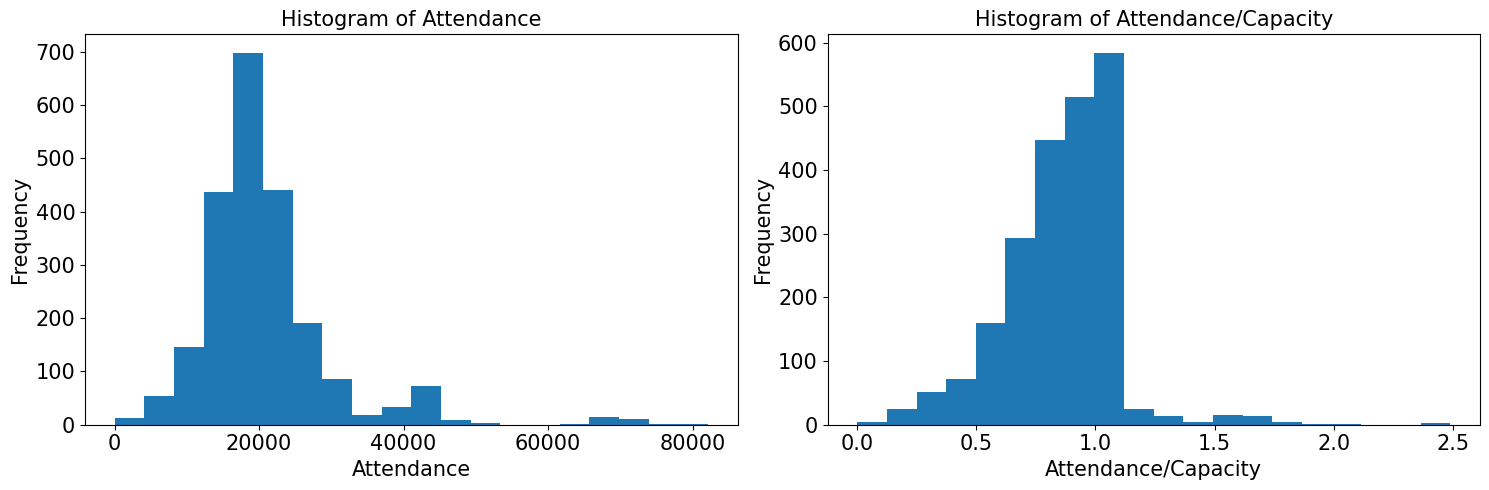

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

mlsall_df['attendance'].plot.hist(bins=20,
                                  ax=ax[0],
                                  fontsize=15)

ax[0].set_xlabel('Attendance',fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)
ax[0].set_title('Histogram of Attendance',fontsize=15)

mlsall_df['att_div_capacity'].plot.hist(bins=20,
                                        ax=ax[1],
                                        fontsize=15)

ax[1].set_xlabel('Attendance/Capacity',fontsize=15)
ax[1].set_ylabel('Frequency', fontsize=15)
ax[1].set_title('Histogram of Attendance/Capacity',fontsize=15)

fig.tight_layout()

I have two choices for the target variable for this project: raw attendance or attendance divided by stadium capacity. Different teams have different sized stadiums, so an attendance of 20,000 might be great for one team, but pretty poor for another team. Dividing by the capacity of the stadium makes it more reasonable to compare the attendance of different matches, so I will use that as the target variable.

One might think that the attendance/capacity could not exceed 1 (how could the attendance be 1.5 times the capacity?), but there are a fair number of matches with values above 1. The reason for this is that some teams artifically reduce the capacity of their stadium most of the time, but on special occasions, they will use the full capacity. An example of this is the Seattle Sounders who share Lumen Field with the Seattle Seahawks of the NFL. The actual capacity of the stadium is 72,000, but the Sounders typically cap attendance at just below 38,000. However, the Sounders will use the full stadium for special occasions like playoff games or matches against rivals.

I considered rounding every value above 1 down to 1, but decided against it. The reason to round down would be to correct for the changing capacity of some stadiums from match to match. However, I figured that a match should get credit for its inflated attendance because there was likely a compelling reason why the capacity was increased. Therefore, I will leave the values that are above 1 as they are.

**Attendance vs. Month**

Below, I look at the distribution of matches by month and the attendance by month.

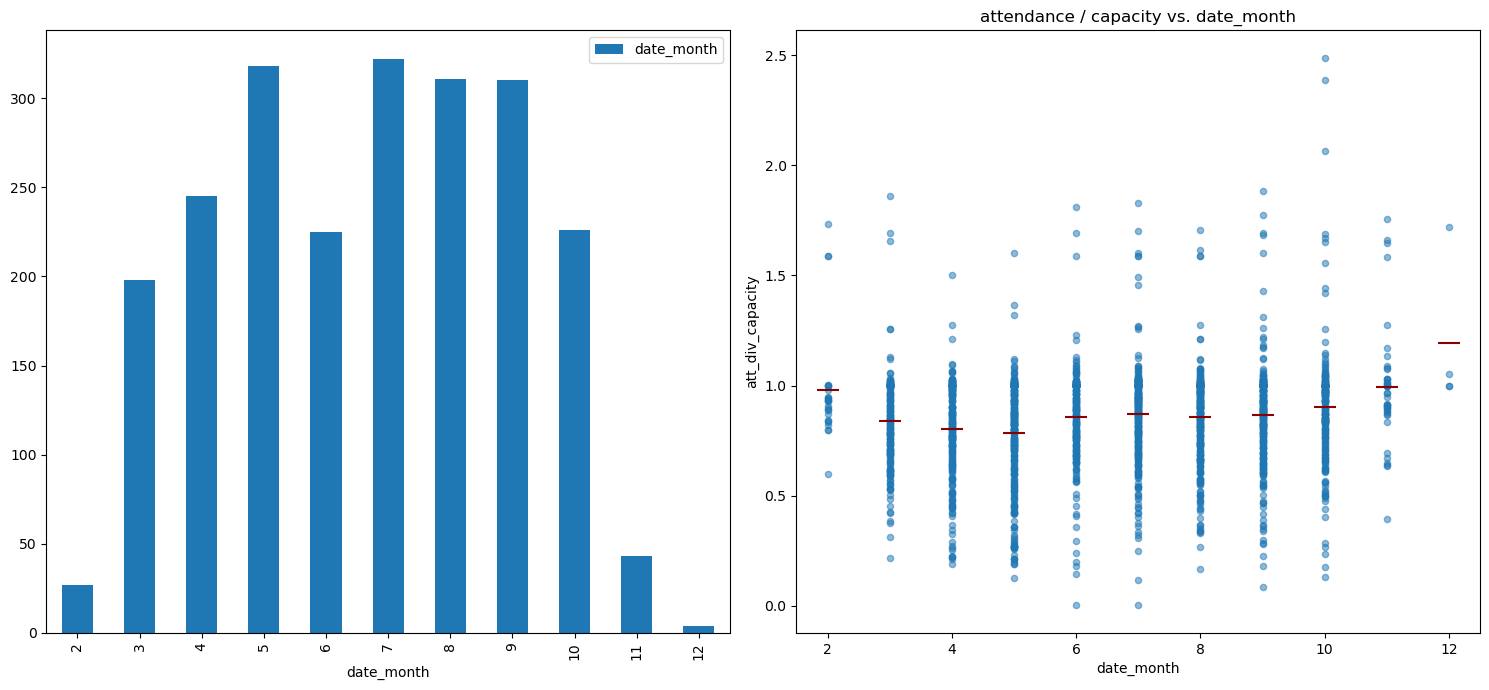

In [8]:
make_bar_scatter(mlsall_df, 'date_month')

Most matches are played between March and October. A smaller number of matches are played in February, November, and December.

The reason fewer matches have been in February is because MLS currently starts the season in late February, so they don't use the whole month. In fact, MLS used to start the season in March, avoiding February entirely.

The reason there are fewer matches in November and December is because this is when the playoffs are held.

In [12]:
# Group by month
mlsall_df.groupby('date_month').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude   longitude  \
date_month                                                                      
2                   0.979038   17.240741  26163.148148  36.310000  -95.855185   
3                   0.836999   17.329545  20765.015152  38.498485  -93.147727   
4                   0.802260   17.865306  19322.179592  38.843837  -92.648245   
5                   0.783570   18.143082  19150.311321  38.701730  -94.029780   
6                   0.858731   18.742222  21328.648889  39.184400  -94.173733   
7                   0.870895   19.078934  21225.347826  38.811304  -94.250280   
8                   0.857170   19.146034  20640.752412  38.742958  -93.691768   
9                   0.867673   18.592204  20882.954839  38.948742  -94.815548   
10                  0.903899   17.486357  22139.203540  38.535531  -93.726991   
11                  0.993807   16.906977  25237.255814  40.271395  -97.451395   
12                  1.192861   15.625000  35735.500000  41.155000 -101.290000   

            real_home_team  temperature      rain      snow  cloudcover  \
date_month                                                                
2                 1.000000    47.370370  0.203704  0.007778   69.777778   
3                 0.984848    48.925253  0.145960  0.010960   51.606061   
4                 0.991837    58.677551  0.181224  0.004286   50.983673   
5                 0.996855    69.046855  0.212579  0.000000   49.792453   
6                 0.986667    77.578222  0.194667  0.000000   38.395556   
7                 0.996894    82.728261  0.170497  0.000000   37.770186   
8                 0.993569    81.895820  0.335370  0.000000   41.147910   
9                 0.993548    75.291613  0.217097  0.000000   42.090323   
10                0.986726    64.000000  0.116372  0.000000   45.407080   
11                1.000000    47.888372  0.097674  0.000000   33.651163   
12                1.000000    40.850000  1.100000  0.000000   71.750000   

            windspeed   windgust  rain_sum  snow_sum   playoff  same_conf  \
date_month                                                                  
2            9.251852  22.214815  1.448148  0.194444  0.000000   0.629630   
3           14.048990  31.116162  2.292929  0.348586  0.000000   0.707071   
4           14.571020  32.659184  2.429796  0.023714  0.000000   0.681633   
5           11.687421  27.818553  2.238679  0.000000  0.000000   0.745283   
6           10.888889  27.561778  2.410667  0.000000  0.000000   0.724444   
7           10.224845  26.158075  1.304658  0.000000  0.000000   0.773292   
8            9.892926  25.369132  2.083923  0.000000  0.000000   0.813505   
9           10.337097  25.084194  1.520968  0.000000  0.000000   0.790323   
10          11.686726  26.862389  2.110177  0.004956  0.115044   0.933628   
11           9.467442  22.172093  1.665116  0.001628  0.604651   0.953488   
12          14.475000  31.750000  6.300000  0.000000  1.000000   0.500000   

              rivals  
date_month            
2           0.000000  
3           0.035354  
4           0.048980  
5           0.078616  
6           0.062222  
7           0.102484  
8           0.131833  
9           0.083871  
10          0.088496  
11          0.069767  
12          0.000000

The highest attendance values occur in February, November, and December. The attendance is likely high in February because people are excited for the new season. Attendance is high in November and December because that is when the playoffs are happening and the playoffs are the most exciting part of the season. In fact, the attendance in December is 119% capacity. This is because MLS Cup, the championship match, is held in December. Since that match decides the champion, there is high demand for tickets and a stadium's full capacity will be used rather than the artifically reduced capacity.

The attendance in March through May was below the averag of 85% while the attendance from June to October was above the average. This seems to indicate that the attendance improves as the season progresses.

The average temperature at kick-off was pretty low for November and December (47.9 and 40.9 degrees Fahrenheit, respectively), but the attendance was still very good. This shows that people are willing to deal with low temperatures to attend playoff matches.

There are also a couple interesting trends I saw in the table that are not directly related to attendance.
1. The kick-off time (local_time) is earlier at the beginning and end of the season, but later in the middle of the season. I think the most likely reason for this is that this helps manage temperature. During the winter, MLS has earlier kick-off times because it gets too cold later in the night. During the summer, the kick-off times are later to allow for the temperature to drop to a more comfortable level. Importantly, MLS abandoned this strategy in 2023 by making kick-off times more consistent (see next cell).

2. The average longitude in February was about 2 degrees lower than the other months in which regular season games are played (March through October). This might be due to smaller sample size (because fewer games are played in February), but it could also be intentional. By playing February matches at locations at lower latitudes, MLS avoids playing matches in very cold conditions (Canada winters can be brutal). In fact, MLS used to start the season in mid-March to avoid playing in February altogether, but they have been forced to start earlier because they have to play so many matches between MLS and other competitions.

**Attendance vs. Day of the Week**

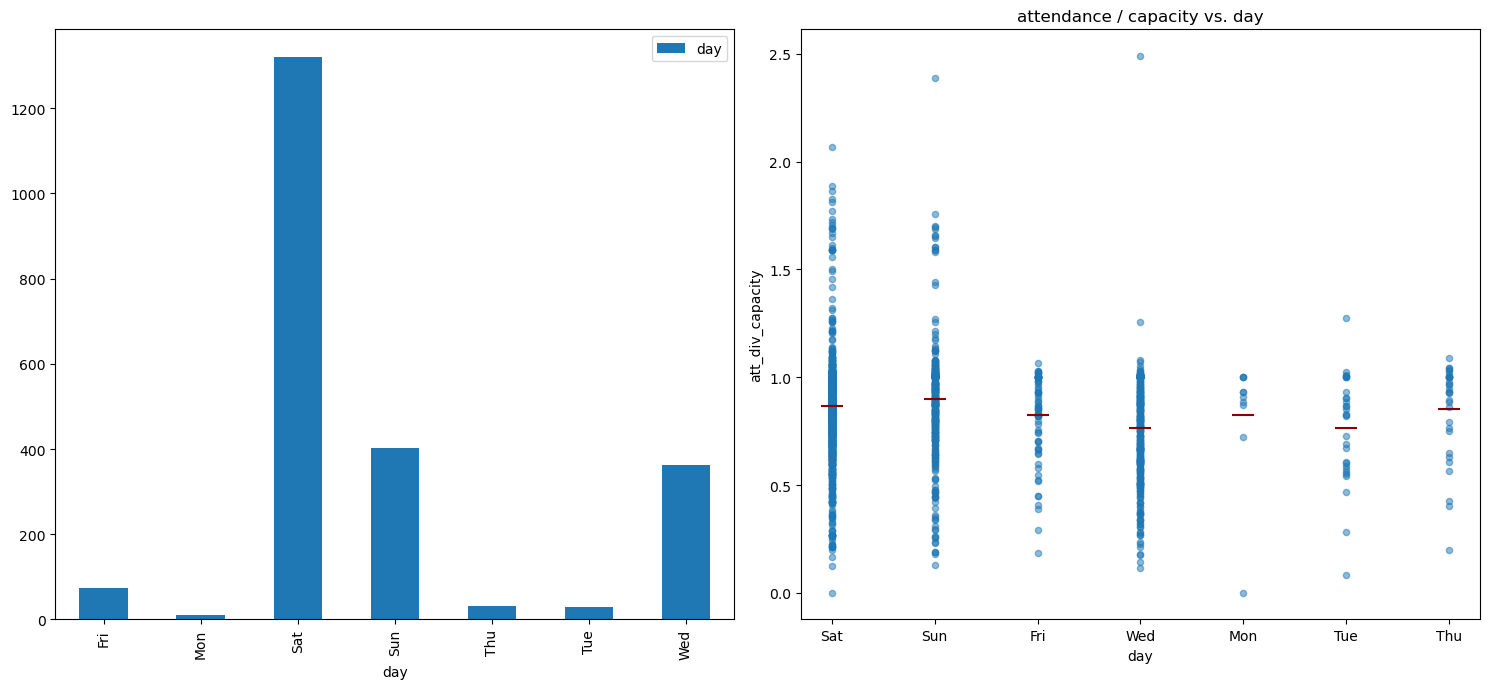

In [13]:
make_bar_scatter(mlsall_df, 'day')

Most matches have been held on Saturdays with Sundays and Wednesdays the next most frequent. MLS used to hold a single match on Fridays, but they abandoned that for the 2023 season. A small number of matches have been held on Mondays, Tuesdays, and Thursdays.

It looks as though matches held on weekends have higher attendance. Let's confirm that below by looking at the mean values for each day.

In [14]:
# Group by day
mlsall_df.groupby('day').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude   longitude  \
day                                                                      
Fri          0.825588   19.450913  19757.041096  38.783151  -98.473562   
Mon          0.825168   18.950000  21423.800000  39.553000 -101.327000   
Sat          0.865025   18.397207  20729.835481  38.888688  -93.331092   
Sun          0.899636   16.704715  23227.210918  38.805037  -95.238809   
Thu          0.853490   19.453125  20889.000000  36.927500  -95.019688   
Tue          0.765152   19.483333  20713.600000  37.002000  -98.483333   
Wed          0.764002   19.471685  18646.784530  38.724116  -93.359724   

     real_home_team  temperature      rain      snow  cloudcover  windspeed  \
day                                                                           
Fri        1.000000    73.989041  0.321918  0.012466   35.123288  11.502740   
Mon        0.900000    69.680000  0.060000  0.000000   38.200000  11.800000   
Sat        0.994693    69.298180  0.204625  0.001751   46.823351  11.859666   
Sun        0.987593    66.628040  0.159305  0.000521   44.218362  10.232506   
Thu        1.000000    74.196875  0.331250  0.000000   36.031250  10.365625   
Tue        0.966667    76.566667  0.063333  0.000000   33.400000   9.960000   
Wed        0.991713    76.974033  0.223481  0.000000   39.745856  11.306630   

      windgust  rain_sum  snow_sum   playoff  same_conf    rivals  
day                                                                
Fri  27.915068  1.672603   0.00863  0.000000   0.821918  0.191781  
Mon  26.560000  1.030000   0.14000  0.200000   0.700000  0.000000  
Sat  28.173920  2.132600   0.05376  0.009098   0.753601  0.078089  
Sun  24.916377  1.635980   0.02067  0.057072   0.791563  0.091811  
Thu  26.050000  1.868750   0.00000  0.312500   0.781250  0.156250  
Tue  24.376667  0.696667   0.00000  0.133333   0.733333  0.100000  
Wed  27.566575  2.129282   0.00000  0.013812   0.823204  0.052486

The best attendance was on Sundays where the attendance was at 90% capacity on average. Saturday has the second highest attendance at 86%. Mondays and Fridays both have 82.5% attendance on average while Tuesdays and Wednesdays have 76.5%, far below average.

Another interesting trend is that matches on Sundays started about an hour and a half earlier than matches on Saturdays. This might indicate that earlier matches could be a good thing if it is not a school/work day.

**Does Attendance on Sundays decline when NFL starts?**

The main reason MLS plays out of sync with European soccer is to avoid cold winter weather, but another argument that has been made is that MLS wants to avoid going head-to-head with the NFL. The worry is that MLS attendance would tank if sports fans could go to NFL games instead of MLS matches. Below, I check that assumption by looking at the attendance of Sunday MLS regular season matches before and after the NFL season starts. NFL usually starts in early September, so I will use that as the cutoff. I only include regular season matches because the playoffs would boost attendance and bias the comparison.

In [16]:
# Sunday, regular season matches before NFL starts
mlsall_df.loc[(mlsall_df['date_month']<9)&\
              (mlsall_df['day']=='Sun')&\
              (mlsall_df['playoff']==0),'att_div_capacity'].agg(['mean','count'])

mean       0.870035
count    242.000000
Name: att_div_capacity, dtype: float64

In [17]:
# Sunday, regular season matches after NFL starts
mlsall_df.loc[(mlsall_df['date_month']>=9)&\
              (mlsall_df['day']=='Sun')&\
              (mlsall_df['playoff']==0),'att_div_capacity'].agg(['mean','count'])

mean       0.926718
count    138.000000
Name: att_div_capacity, dtype: float64

It turns out that attendance actually improves after NFL starts rather than getting worse.

In 242 matches prior to the NFL starting, the average attendance was 87%. In 138 matches after the NFL starts, the attendance was 92.7%.

I do not think the improvement in attendance is caused by the NFL starting. Rather, I think the fact that the season is winding down and matches are becoming more important as the playoff picture becomes clearer drives attendance up and that the NFL just doesn't have that much of an effect.

**Attendance vs. Kick Off Time**

In [18]:
mlsall_df['local_time_round'] = mlsall_df['local_time'].apply(lambda x: np.round(2*x)/2)

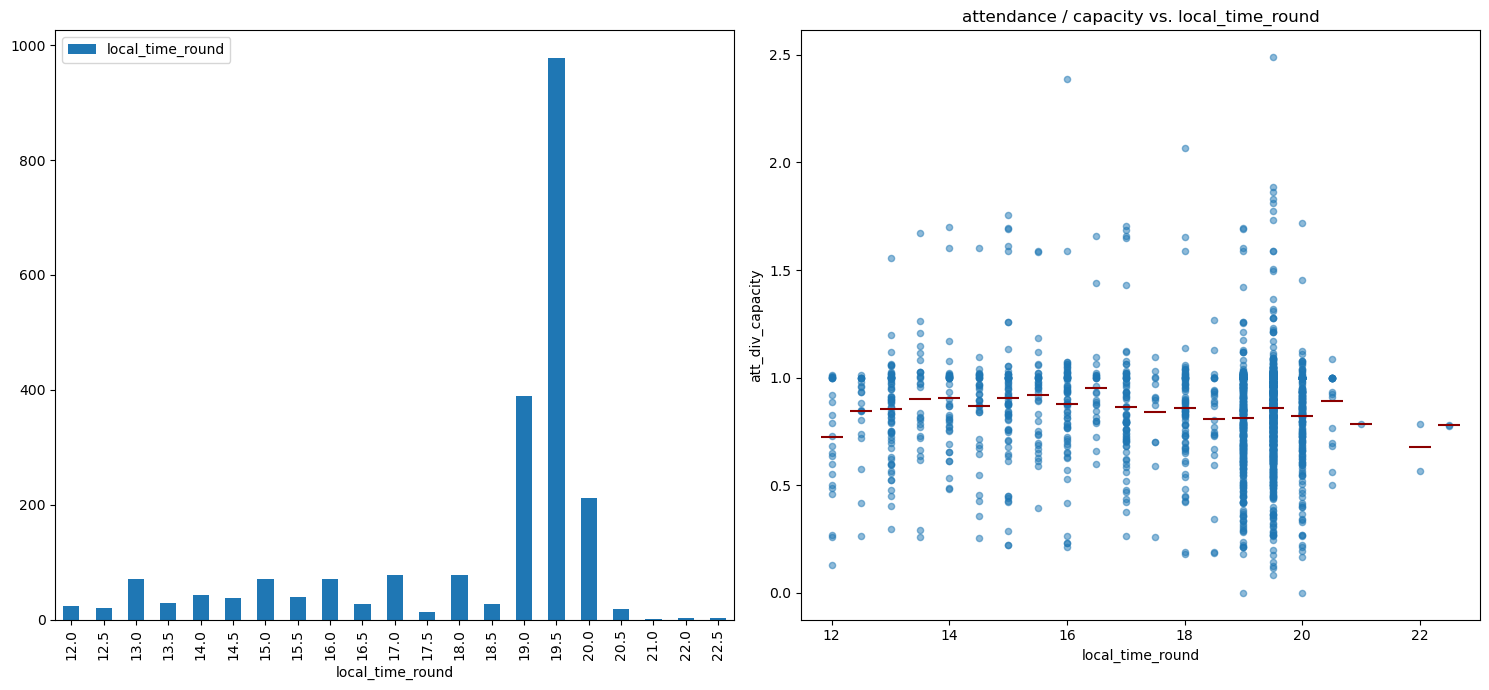

In [19]:
make_bar_scatter(mlsall_df, 'local_time_round')

In [20]:
# Group by kick off time
mlsall_df.groupby('local_time_round').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude  \
local_time_round                                                          
12.0                      0.725057   12.000000  18508.750000  40.707500   
12.5                      0.843898   12.500000  22142.428571  39.488095   
13.0                      0.853092   12.996479  23458.985915  41.096761   
13.5                      0.900725   13.500000  23687.821429  40.979643   
14.0                      0.905007   13.998062  23577.232558  39.624186   
14.5                      0.870446   14.500000  20275.000000  37.918919   
15.0                      0.905347   15.000000  24096.757143  39.048286   
15.5                      0.918623   15.500000  26998.717949  38.340000   
16.0                      0.878904   15.998826  22503.239437  38.840000   
16.5                      0.951799   16.500000  26200.333333  38.466667   
17.0                      0.865658   16.994658  23394.384615  38.632051   
17.5                      0.841329   17.500000  18675.230769  37.693846   
18.0                      0.860268   18.000000  22616.282051  38.652564   
18.5                      0.809653   18.500000  20064.185185  39.564444   
19.0                      0.813698   19.000641  20123.664103  40.409308   
19.5                      0.861027   19.500000  20262.958035  38.391699   
20.0                      0.819807   20.000786  18435.518868  36.926981   
20.5                      0.892198   20.500000  18424.166667  33.301111   
21.0                      0.782750   21.000000  15655.000000  38.870000   
22.0                      0.677157   22.000000  17267.500000  28.540000   
22.5                      0.778985   22.500000  22085.000000  43.630000   

                   longitude  real_home_team  temperature      rain      snow  \
local_time_round                                                                
12.0              -99.953333        0.958333    49.804167  0.191667  0.000000   
12.5             -108.310000        1.000000    51.471429  0.142857  0.000000   
13.0              -94.143099        0.971831    52.642254  0.143662  0.000000   
13.5             -100.031429        0.964286    45.621429  0.132143  0.005000   
14.0             -101.294884        1.000000    54.741860  0.025581  0.001628   
14.5              -95.589459        1.000000    57.329730  0.294595  0.000000   
15.0              -91.895571        1.000000    55.901429  0.182857  0.000000   
15.5              -85.632051        1.000000    61.543590  0.092308  0.000000   
16.0              -92.995070        1.000000    62.857746  0.057746  0.003944   
16.5              -99.596296        1.000000    55.748148  0.055556  0.000000   
17.0              -91.985000        1.000000    67.476923  0.178205  0.000897   
17.5              -92.087692        1.000000    65.669231  0.253846  0.000000   
18.0              -90.963718        0.987179    70.100000  0.191026  0.000000   
18.5             -100.783333        1.000000    75.403704  0.003704  0.000000   
19.0              -99.099949        0.997436    72.421795  0.181282  0.000000   
19.5              -92.099969        0.992835    73.512692  0.206448  0.002794   
20.0              -91.762311        0.990566    81.945755  0.376415  0.000000   
20.5              -93.997222        1.000000    80.977778  0.511111  0.000000   
21.0              -77.010000        1.000000    76.500000  0.300000  0.000000   
22.0              -81.390000        1.000000    84.900000  0.700000  0.000000   
22.5              -79.420000        0.000000    39.100000  0.400000  0.070000   

                  cloudcover  windspeed   windgust   rain_sum  snow_sum  \
local_time_round                                                          
12.0               43.916667  10.962500  22.770833   2.062500  0.000000   
12.5               55.142857   8.033333  17.852381   0.828571  0.000000   
13.0               53.309859   9.797183  21.987324   1.473239  0.006901   
13.5               52.571429   9.960714  22.382143   

The vast majority of matches started between 7 pm and 8 pm local time. However, there are a fair number of matches that started earlier than 7 pm and the attendance figures are not bad. Each kick off time from 1 pm to 5 pm had an average attendance at or above 85%, which is the average over the entire dataset.

The kick off times with below average attendance are mostly between 5:30 and 10:30 pm. Matches starting at noon also performed quite poorly, only achieving around 72.5% attendance.

The very late kick off times (9 pm or later) had particularly poor attendance, but there are two caveats to this. There are only 5 matches that started this late, so the sample size is small. Also, I expect that MLS did not originally intend for these matches to start so late. Four of the matches had rain and the fifth had snow. This indicates to me that there was a solid chance the matches were suspended for some amount of time (see the next cell to see these matches).

In [21]:
# Matches that started at 9 pm or later
mlsall_df[mlsall_df['local_time_round']>=21]

round  day        date  local_time  home_team  home_score  \
233   Regular Season  Wed  2018-07-25        21.0          8           0   
1563  Regular Season  Sat  2022-07-09        22.0         19           1   
1693  Regular Season  Wed  2022-08-31        22.0         19           3   
1830  Regular Season  Sun  2023-03-12        22.5         11           4   
1858  Regular Season  Sat  2023-03-25        22.5         11           2   

      away_score  away_team  attendance           stadium  ...  snow  \
233            1         18       15655        Audi Field  ...  0.00   
1563           0         13       20052  Exploria Stadium  ...  0.00   
1693           2         24       14483  Exploria Stadium  ...  0.00   
1830           0         16       22007         BMO Field  ...  0.14   
1858           1          7       22163         BMO Field  ...  0.00   

      cloudcover  windspeed  windgust  rain_sum  snow_sum  date_year  \
233         52.0        9.0      19.8      12.6      0.00       2018   
1563        47.0       10.9      23.0       0.2      0.00       2022   
1693        69.0        7.2      14.0       2.5      0.00       2022   
1830       100.0       14.1      20.5       0.0      0.49       2023   
1858       100.0       28.2      54.0      13.3      1.19       2023   

      date_month  date_day  local_time_round  
233            7        25              21.0  
1563           7         9              22.0  
1693           8        31              22.0  
1830           3        12              22.5  
1858           3        25              22.5  

[5 rows x 29 columns]

**Did adjustment to kick off times in 2023 help attendance?**

Prior to 2023, MLS used to have a lot of variability in kick off times, but this past season, they tried to standardize it more by having most matches start at 7:30 pm local time. This can be seen in the distribution of matches played on Sundays, in particular, which I show below.

Text(0.5, 1.0, 'Sunday kick of times in 2023')

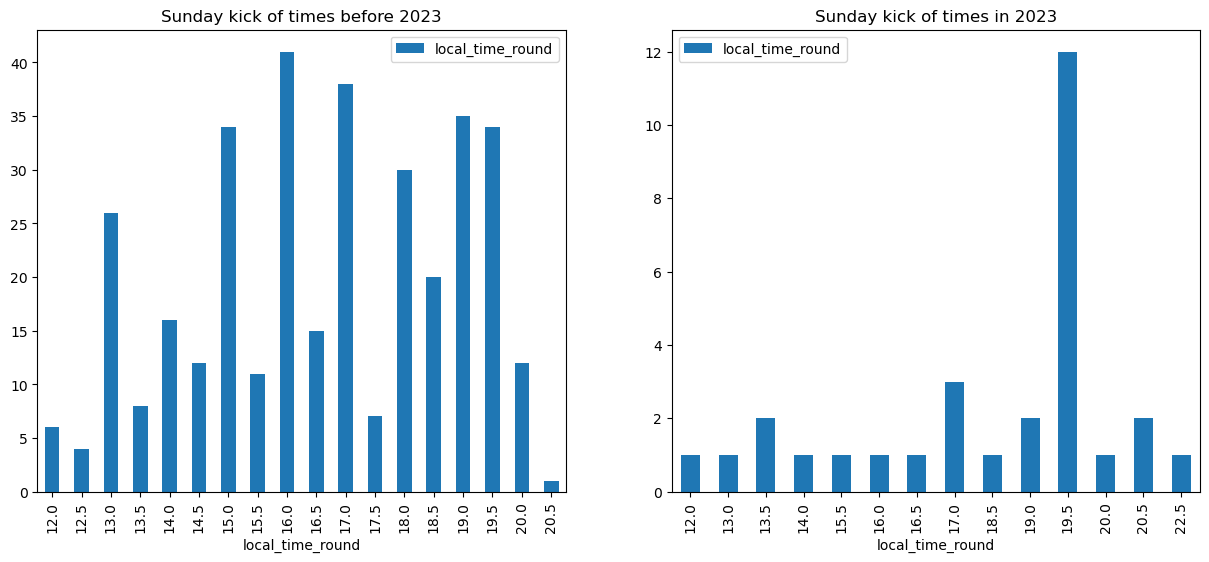

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

mlsall_df[(mlsall_df['date_year']!=2023)&\
          (mlsall_df['day']=='Sun')&\
          (mlsall_df['playoff']==0)].\
groupby('local_time_round').agg({'local_time_round':'count'}).plot.bar(ax=ax[0])

ax[0].set_title('Sunday kick of times before 2023')

mlsall_df[(mlsall_df['date_year']==2023)&\
          (mlsall_df['day']=='Sun')&\
          (mlsall_df['playoff']==0)].\
groupby('local_time_round').agg({'local_time_round':'count'}).plot.bar(ax=ax[1])

ax[1].set_title('Sunday kick of times in 2023')

Between 2018 and 2022 (excluding 2020), Sunday kick off times were all over the place. The most common kick off time was 4 pm.

In 2023, 40% of Sunday matches started at 7:30 pm, which was by far the most common kick off time. Did this improve attendance?

In [23]:
# Sunday 2018,2019,2021,2022 attendance
mlsall_df.loc[(mlsall_df['date_year']!=2023)&(mlsall_df['day']=='Sun'),['att_div_capacity','local_time']].describe()

att_div_capacity  local_time
count        373.000000  373.000000
mean           0.902015   16.603217
std            0.254090    2.208159
min            0.128760   12.000000
25%            0.795411   15.000000
50%            0.940867   16.500000
75%            1.003633   18.500000
max            2.386024   20.500000

In [24]:
# Sunday 2023 attendance
mlsall_df.loc[(mlsall_df['date_year']==2023)&(mlsall_df['day']=='Sun'),['att_div_capacity','local_time']].describe()

att_div_capacity  local_time
count         30.000000   30.000000
mean           0.870052   17.966667
std            0.194867    2.619336
min            0.296680   12.000000
25%            0.762492   16.625000
50%            0.983598   19.500000
75%            1.005186   19.500000
max            1.046541   22.500000

The average attendance for Sunday matches between 2018 and 2022 was 90.2%. In 2023, when the average kick off time was about an hour and 20 minutes later, the average was 87.0%. This would seem to indicate that the move to later kick offs made attendance worse.

**Attendance by Year**

This dataset contains 5 MLS seasons: 2018, 2019, 2021, 2022, and 2023. The 2020 MLS season is not being used for this analysis because almost the entire season was played without fans in attendance due to the COVID-19 pandemic.

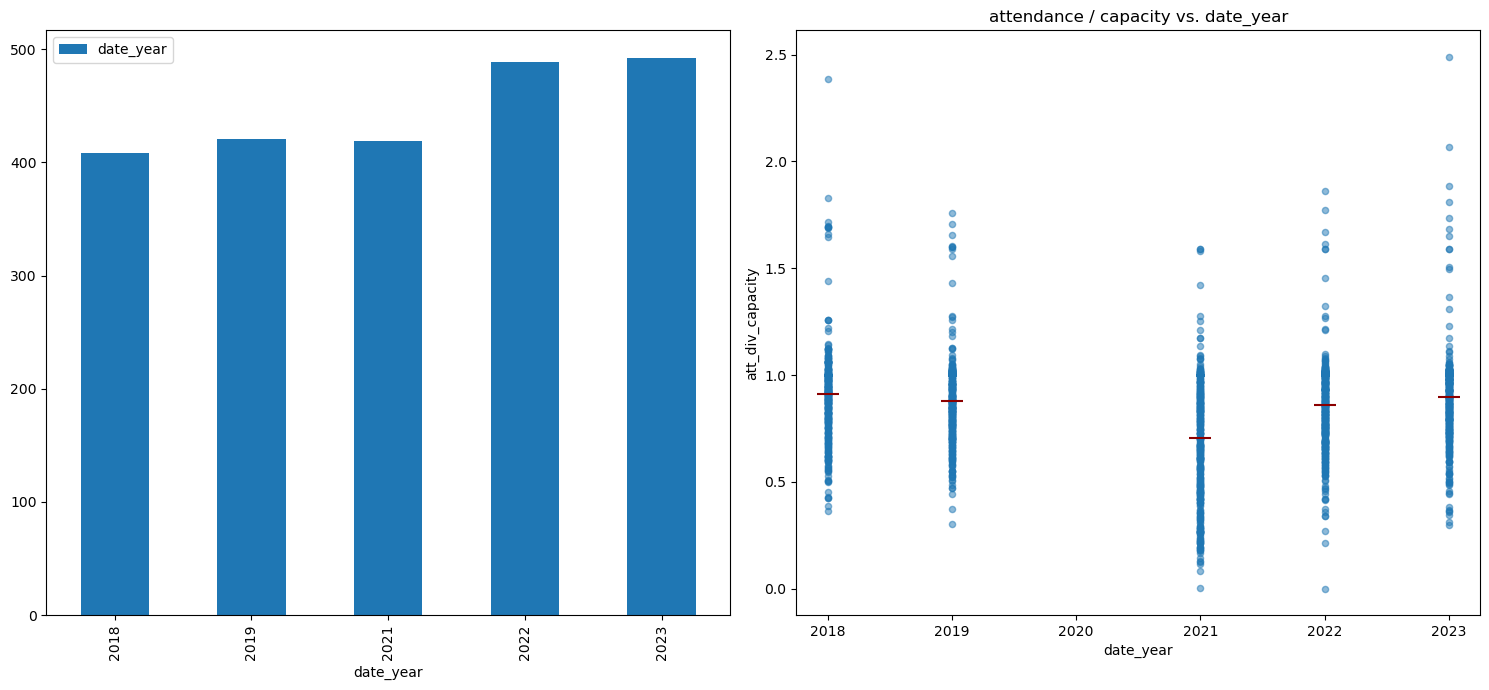

In [25]:
make_bar_scatter(mlsall_df, 'date_year')

In [26]:
# Group by year
mlsall_df.groupby('date_year').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude  longitude  \
date_year                                                                     
2018               0.910684   17.938930  22174.053922  39.580637 -94.942990   
2019               0.877872   18.045131  21722.232779  39.589406 -94.701876   
2021               0.707067   18.356205  16846.233890  38.039475 -94.076181   
2022               0.860713   18.001534  20977.822086  38.381329 -93.384110   
2023               0.895493   19.213415  22136.000000  38.508394 -93.067398   

           real_home_team  temperature      rain      snow  cloudcover  \
date_year                                                                
2018             1.000000    67.617402  0.194118  0.002230   44.213235   
2019             0.995249    69.773397  0.235867  0.000831   47.800475   
2021             0.980907    72.595465  0.220525  0.000000   43.840095   
2022             0.993865    70.914724  0.143967  0.001861   43.100204   
2023             0.991870    70.796748  0.224187  0.002561   43.619919   

           windspeed   windgust  rain_sum  snow_sum   playoff  same_conf  \
date_year                                                                  
2018       11.460784  27.260049  1.912990  0.018873  0.041667   0.674020   
2019       11.411164  27.914252  2.240618  0.031093  0.030879   0.655582   
2021       10.732220  26.338663  2.330788  0.000167  0.031026   0.945107   
2022       11.741718  27.543763  1.393047  0.030061  0.026585   0.768916   
2023       11.644715  27.787195  2.183943  0.092907  0.000000   0.817073   

             rivals  
date_year            
2018       0.083333  
2019       0.066508  
2021       0.097852  
2022       0.071575  
2023       0.087398

The best attendance numbers, both in terms of percentage and raw value, was 2018 when the average attendance was 22,174 (91%).

The worst year for attendance was 2021 when the average attendance was 16,846 (70.7%). I think a big part of this was the pandemic. Even though I removed matches that had no fans, the dataset does include some matches where the attendance was artifically reduced for safety reasons and I think it took people a while to get comfortable to return to large gatherings.

**Attendance for Conference vs. Non-Conference Matches**

MLS is split into a Western and an Eastern Conference. Teams play most of their matches against teams from the same conference. The 'same_conf' column says whether the teams in a given match are from the same conference. Let's see if their is a difference in attendance between conference and non-conference matches. I will only look at regular season matches.

In [27]:
# Conference matches
mlsall_df[(mlsall_df['same_conf']==1)&\
          (mlsall_df['playoff']==0)][['att_div_capacity','attendance']].mean()

att_div_capacity        0.842100
attendance          20525.866707
dtype: float64

In [28]:
# Non-conferences matches
mlsall_df[(mlsall_df['same_conf']==0)&\
          (mlsall_df['playoff']==0)][['att_div_capacity','attendance']].mean()

att_div_capacity        0.868322
attendance          21119.736000
dtype: float64

Non-conference matches had an attendance percentage of 86.8% compared to 84.2% for conference matches. This might seem to indicate that non-conference matches are better attended, if only slightly. However, I think something else is going on. In 2021, the season in which attendance was low because of the pandemic, 94.5% of matches were conference matches. In other seasons, that value ranges from 67% to 81%. I think this is biasing the attendance of conference matches to look lower than it would otherwise. Let's look at the numbers without 2021 included.

In [29]:
# Conference matches (excluding 2021)
mlsall_df[(mlsall_df['same_conf']==1)&\
          (mlsall_df['playoff']==0)&\
          (mlsall_df['date_year']!=2021)][['att_div_capacity','attendance']].mean()

att_div_capacity        0.885558
attendance          21697.052754
dtype: float64

In [30]:
# Non-conference matches (excluding 2021)
mlsall_df[(mlsall_df['same_conf']==0)&\
          (mlsall_df['playoff']==0)&\
          (mlsall_df['date_year']!=2021)][['att_div_capacity','attendance']].mean()

att_div_capacity        0.875153
attendance          21283.391213
dtype: float64

If 2021 is removed, then conference games are slightly better attended. The difference between the two values is quite small, indicating that there likely isn't a significant effect on attendance.

**Does attendance improve for rivalry matches?**

One might expect attendance to be higher when rivals play one another. Let's see if that is true.

In [31]:
# Rivals playing
mlsall_df[(mlsall_df['rivals']==1)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance    latitude   longitude  \
count        176.000000  176.000000    176.000000  176.000000  176.000000   
mean           0.869651   18.385890  22485.062500   39.261705 -101.197727   
std            0.194465    2.188235   9794.993923    6.212876   18.972539   
min            0.266407   12.000000   5000.000000   26.190000 -123.110000   
25%            0.770218   18.500000  16658.000000   33.860000 -122.010000   
50%            0.909840   19.500000  20738.000000   39.970000  -97.720000   
75%            1.000000   19.500000  25389.250000   45.520000  -81.390000   
max            1.270250   22.000000  82110.000000   49.280000  -73.550000   

       real_home_team  temperature        rain   snow  cloudcover   windspeed  \
count           176.0   176.000000  176.000000  176.0  176.000000  176.000000   
mean              1.0    73.046023    0.116477    0.0   41.397727   10.815341   
std               0.0    15.685600    0.506654    0.0   35.874556    5.639042   
min               1.0    13.700000    0.000000    0.0    0.000000    1.100000   
25%               1.0    64.600000    0.000000    0.0    8.000000    7.100000   
50%               1.0    74.550000    0.000000    0.0   30.000000   10.150000   
75%               1.0    84.125000    0.000000    0.0   79.250000   13.525000   
max               1.0   104.900000    5.200000    0.0  100.000000   28.100000   

         windgust    rain_sum    snow_sum  playoff   same_conf  rivals  
count  176.000000  176.000000  176.000000    176.0  176.000000   176.0  
mean    25.672159    1.627273    0.022273      0.0    0.982955     1.0  
std      9.751482    4.953619    0.216640      0.0    0.129810     0.0  
min      6.800000    0.000000    0.000000      0.0    0.000000     1.0  
25%     19.700000    0.000000    0.000000      0.0    1.000000     1.0  
50%     24.300000    0.000000    0.000000      0.0    1.000000     1.0  
75%     31.075000    0.100000    0.000000      0.0    1.000000     1.0  
max     61.600000   30.000000    2.590000      0.0    1.000000     1.0

In [32]:
# Not rivals playing
mlsall_df[(mlsall_df['rivals']==0)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity   local_time    attendance     latitude    longitude  \
count       1997.000000  1997.000000   1997.000000  1997.000000  1997.000000   
mean           0.846237    18.360875  20501.888833    38.731387   -93.304256   
std            0.231042     2.040484   9084.442176     5.525733    17.247786   
min            0.000627    12.000000     16.000000    26.190000  -123.110000   
25%            0.726293    18.000000  15621.000000    33.860000  -104.890000   
50%            0.879176    19.500000  19096.000000    39.810000   -87.620000   
75%            1.000000    19.500000  22423.000000    42.090000   -79.420000   
max            2.489441    22.500000  74479.000000    49.280000   -71.260000   

       real_home_team  temperature         rain         snow   cloudcover  \
count     1997.000000  1997.000000  1997.000000  1997.000000  1997.000000   
mean         0.991988    70.623435     0.209765     0.001718    44.793691   
std          0.089173    15.602899     0.823691     0.027399    36.128369   
min          0.000000    18.400000     0.000000     0.000000     0.000000   
25%          1.000000    59.900000     0.000000     0.000000    10.000000   
50%          1.000000    74.200000     0.000000     0.000000    38.000000   
75%          1.000000    82.800000     0.000000     0.000000    80.000000   
max          1.000000   106.300000    11.400000     0.910000   100.000000   

         windspeed     windgust     rain_sum     snow_sum  playoff  \
count  1997.000000  1997.000000  1997.000000  1997.000000   1997.0   
mean     11.483325    27.601853     2.036555     0.038698      0.0   
std       6.275254    11.151406     5.306524     0.543650      0.0   
min       0.000000     4.000000     0.000000     0.000000      0.0   
25%       6.800000    20.200000     0.000000     0.000000      0.0   
50%      10.500000    25.600000     0.000000     0.000000      0.0   
75%      14.800000    33.100000     1.100000     0.000000      0.0   
max      44.700000    88.600000    57.400000    19.040000      0.0   

         same_conf  rivals  
count  1997.000000  1997.0  
mean      0.751127     0.0  
std       0.432469     0.0  
min       0.000000     0.0  
25%       1.000000     0.0  
50%       1.000000     0.0  
75%       1.000000     0.0  
max       1.000000     0.0

The attendance for rivalry games is 87.0%. For non-rivalry games, it is 84.6%. This indicates that rivalry games may be better attended.

**Attendance by Team**

Below, I look at the distribution of attendance for each team. For the sake of labeling, I create a dictionary that changes the team ID number into the team name.

In [33]:
team_names = {0: 'Atlanta United',
              1: 'Austin FC',
              2: 'Charlotte FC',
              3: 'Chicago Fire',
              4: 'FC Cincinnati',
              5: 'Colorado Rapids',
              6: 'Columbus Crew',
              7: 'FC Dallas',
              8: 'D.C. United',
              9: 'Houston Dynamo',
              10: 'Los Angeles Galaxy',
              11: 'Los Angeles FC',
              12: 'Minnesota United',
              13: 'Inter Miami',
              14: 'CF Montreal',
              15: 'Nashville SC',
              16: 'New England Revolution',
              17: 'New York City FC',
              18: 'New York Red Bulls',
              19: 'Orlando City',
              20: 'Philadelphia Union',
              21: 'Portland Timbers',
              22: 'Real Salt Lake',
              23: 'San Jose Earthquakes',
              24: 'Seattle Sounders',
              25: 'Sporting Kansas City',
              26: 'St. Louis FC',
              27: 'Toronto FC',
              28: 'Vancouver Whitecaps'}

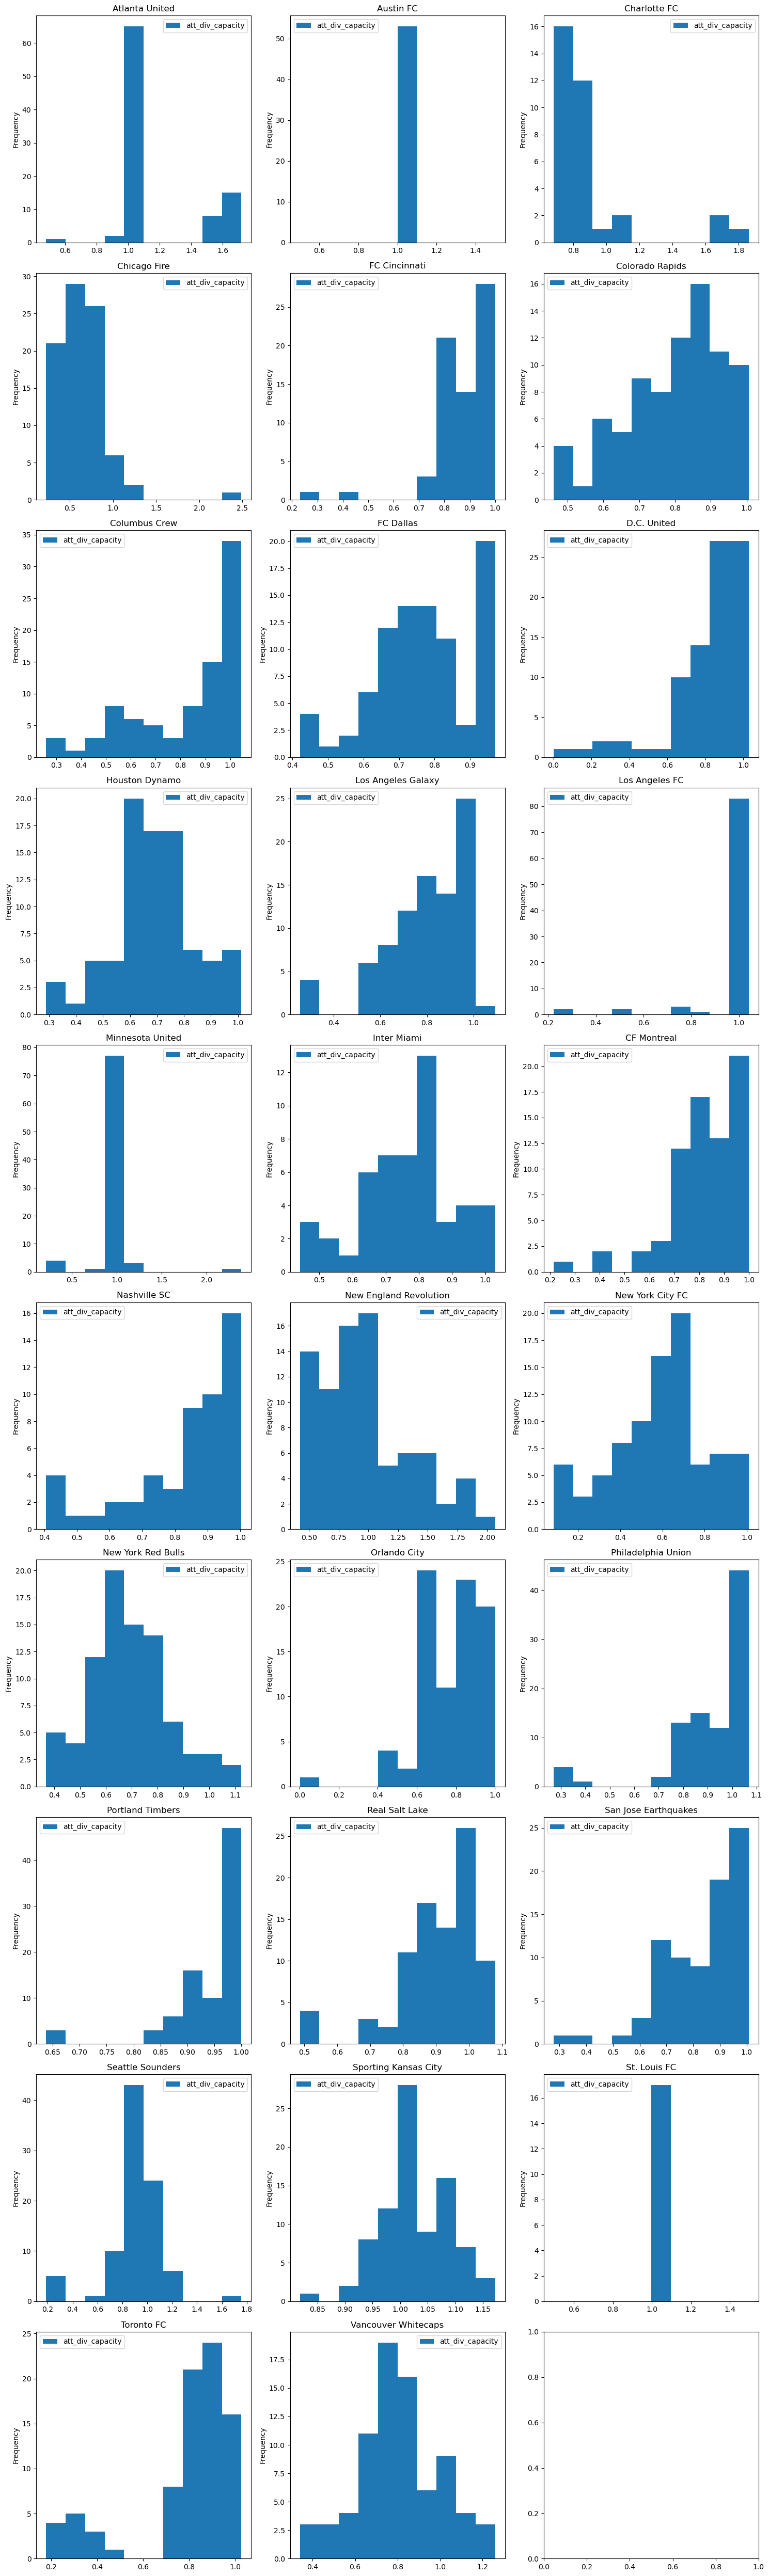

In [34]:
attendance_histograms(mlsall_df, 'home_team', label_dict=team_names)

First, there are a couple teams who have sold out every home match: Austin FC and St. Louis FC. It might be worth excluding their home matches from the analysis because there are no trends to be found.

The following teams have matches at above 100% capacity: Atlanta United, Charlotte FC, Chicago Fire, Minnesota United, New England Revolution, New York Red Bulls, Seattle Sounders, Sporting Kansas City, and Vancouver Whitecaps.

Besides the two teams that always sell out their home matches, there are some teams that nearly sell out each match: Atlanta United, Los Angeles FC, Minnesota United, and Portland Timbers.

In [35]:
# Group by home team
mlsall_df.groupby('home_team').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude   longitude  \
home_team                                                                      
0                  1.167481   17.444139  49617.934066  33.750000  -84.400000   
1                  1.000000   19.136792  20738.000000  30.390000  -97.720000   
2                  0.897910   18.279412  35916.382353  33.230000  -81.020000   
3                  0.633156   17.764706  14370.211765  41.817647  -87.700471   
4                  0.875644   18.845588  24091.191176  39.115000  -84.520000   
5                  0.798020   18.524390  14413.036585  39.810000 -104.890000   
6                  0.832355   18.482558  16643.406977  39.988140  -83.006395   
7                  0.764538   18.623563  15673.022989  33.150000  -96.840000   
8                  0.819084   18.984496  16262.139535  38.874535  -77.007674   
9                  0.692003   18.769608  15251.047059  29.750000  -95.350000   
10                 0.794221   18.063953  22056.604651  33.865233 -118.259186   
11                 0.968377   18.114469  21513.098901  34.325495 -116.998681   
12                 0.988594   17.854651  19717.139535  44.955930  -93.171860   
13                 0.768126   18.800000  14629.860000  26.190000  -80.160000   
14                 0.824471   18.218310  17003.577465  45.560000  -73.550000   
15                 0.833067   18.346154  24992.019231  36.130000  -86.770000   
16                 0.984517   18.780488  19690.341463  42.090000  -71.260000   
17                 0.597915   17.567235  18355.613636  40.808977  -73.950000   
18                 0.690641   18.350198  17266.023810  40.740000  -74.150000   
19                 0.775696   18.688235  19780.247059  28.540000  -81.390000   
20                 0.909492   18.494505  16825.604396  39.830000  -75.380000   
21                 0.949036   18.022549  23022.141176  45.520000 -122.690000   
22                 0.904736   19.051724  18287.436782  40.580000 -111.890000   
23                 0.837747   18.450617  17130.271605  37.355556 -121.926173   
24                 0.904692   16.893519  34872.666667  47.600000 -122.330000   
25                 1.025103   18.563953  18930.581395  39.120000  -94.820000   
26                 0.996578   19.205882  22423.000000  38.630000  -90.210000   
27                 0.785485   18.646341  22875.146341  43.630000  -79.420000   
28                 0.807835   18.096154  17854.794872  49.168462 -122.966154   

           real_home_team  temperature      rain      snow  cloudcover  \
home_team                                                                
0                1.000000    72.389011  0.260440  0.000000   53.406593   
1                1.000000    83.379245  0.083019  0.000000   40.716981   
2                1.000000    77.711765  0.588235  0.000000   52.323529   
3                1.000000    64.404706  0.150588  0.000000   44.152941   
4                1.000000    73.563235  0.095588  0.001029   44.058824   
5                1.000000    68.515854  0.020732  0.005122   29.158537   
6                1.000000    68.239535  0.097674  0.000000   50.813953   
7                1.000000    78.032184  0.441379  0.000000   37.252874   
8                1.000000    73.845349  0.186047  0.004884   46.441860   
9                1.000000    81.374118  0.478824  0.000000   47.223529   
10               0.988372    72.309302  0.031395  0.000000   29.883721   
11               0.956044    72.149451  0.020879  0.003077   27.670330   
12               1.000000    64.967442  0.068605  0.004070   40.639535   
13               1.000000    84.118000  0.634000  0.000000   50.180000   
14               1.000000    66.277465  0.181690  0.000000   50.380282   
15               1.000000    75.359615  0.232692  0.000000   47.596154   
16               1.000000    65.656098  0.203659  0.011098   55.341463   
17               0.863636    68.494318  0.127273  0.000000   46.079545   
18               1.000000    70.409524  0.152381  

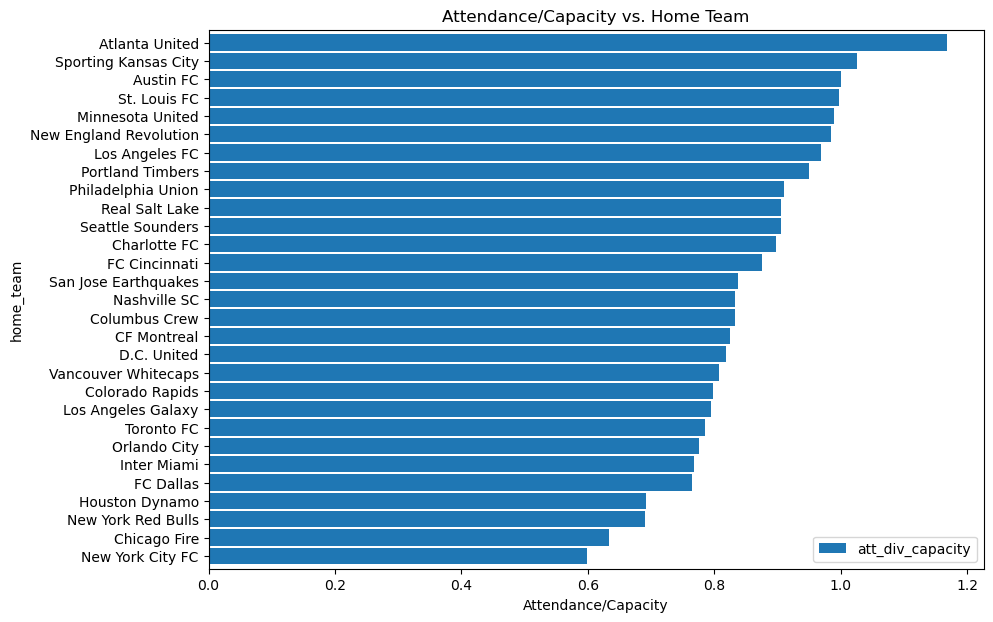

In [36]:
# Plot of attendance/capacity vs. home team
ax = mlsall_df.groupby('home_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='att_div_capacity').\
plot.barh(y='att_div_capacity',
          title='Attendance/Capacity vs. Home Team',
          xlabel='Attendance/Capacity',
          width=0.9,
          figsize=(10,7))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('home_team').\
                                                      agg({'att_div_capacity':'mean'})['att_div_capacity']).values]);

The team with the worst average attendance is New York City FC (59.8%). The Chicago Fire are not much better at 63.3%.

**Attendance vs. Away Team**

It is possible that certain away teams drive attendance more than others. This could be because they have a star player that people want to see (think Lionel Messi in 2023), or that people just want to see matches against stronger opponents.

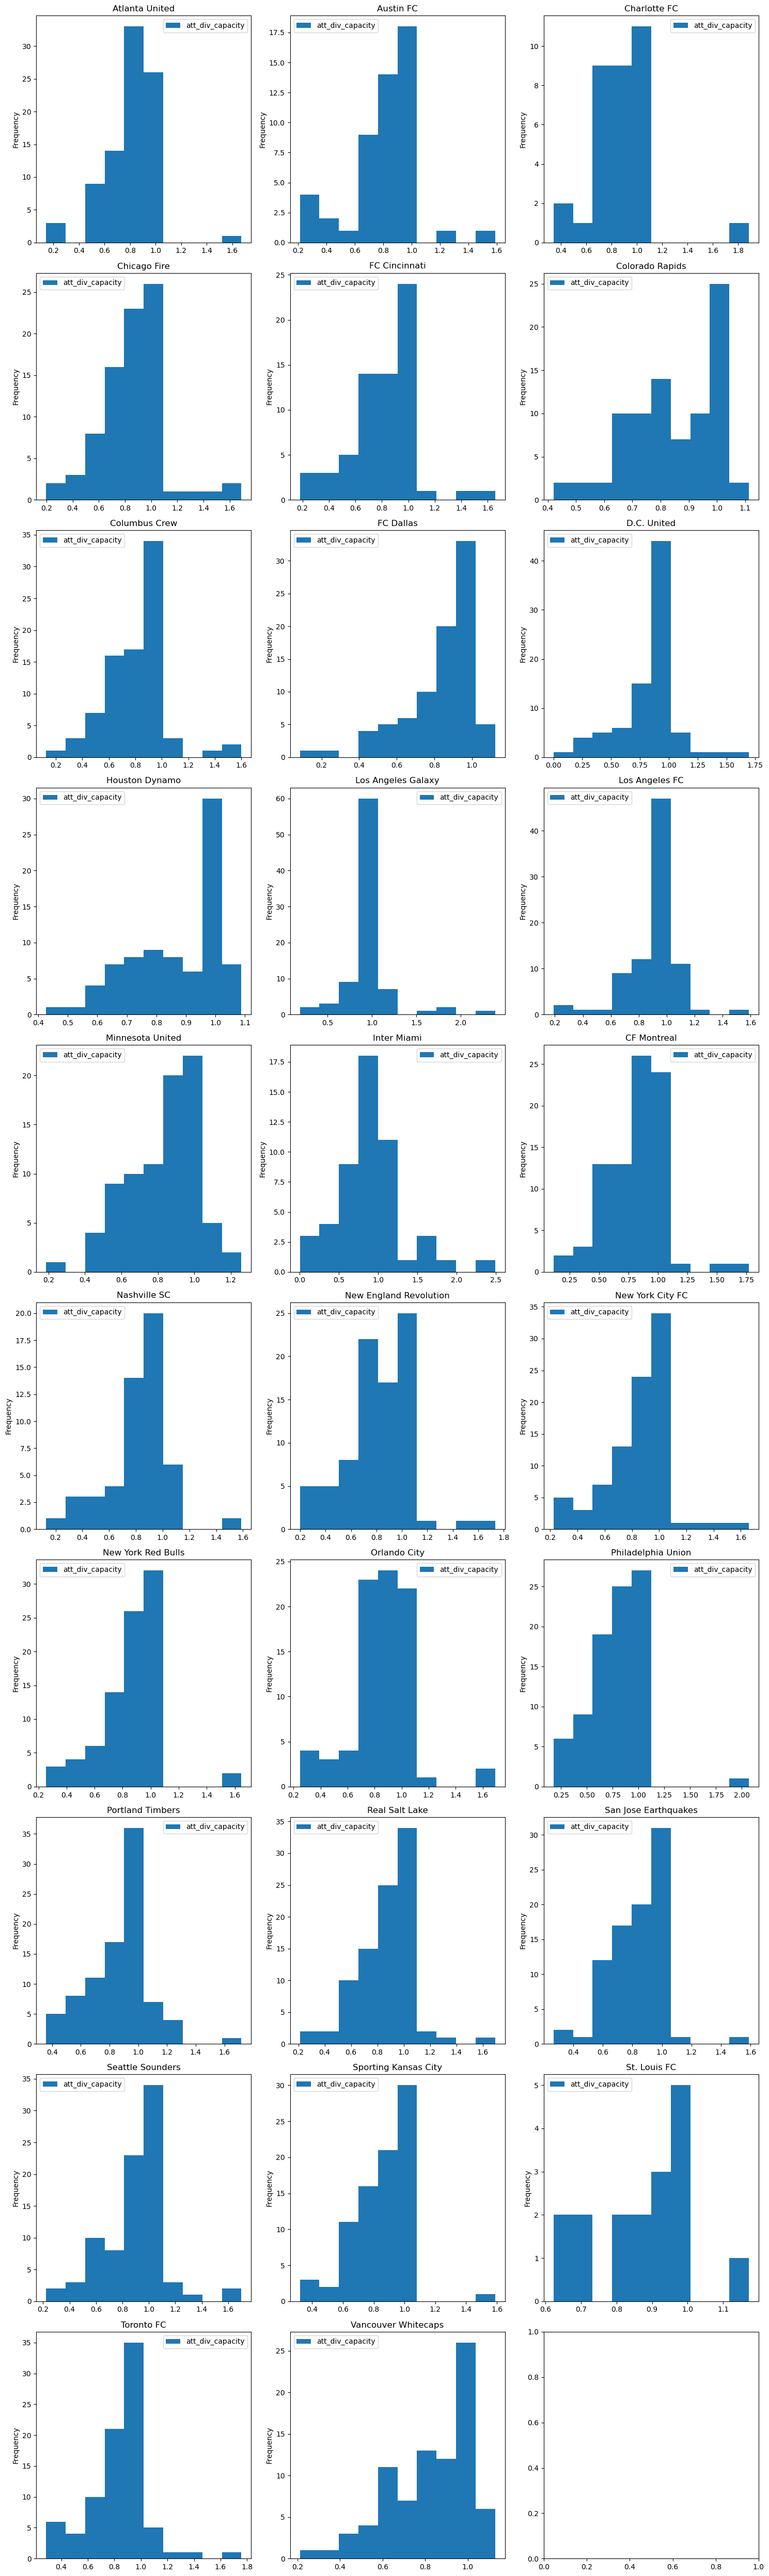

In [37]:
attendance_histograms(mlsall_df, 'away_team', label_dict=team_names)

In [38]:
# Group by away team
mlsall_df.groupby('away_team').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude   longitude  \
away_team                                                                      
0                  0.813420   17.975775  19634.779070  38.980581  -86.190349   
1                  0.821436   18.370000  19212.340000  38.762400 -103.591000   
2                  0.871524   19.196970  21520.636364  38.665455  -85.441818   
3                  0.851394   18.445783  21309.867470  38.718434  -85.968313   
4                  0.821742   18.772727  20562.484848  38.603939  -84.932424   
5                  0.844569   18.479167  19850.035714  38.751548 -101.210238   
6                  0.825024   18.392857  20776.869048  38.518571  -85.830476   
7                  0.838161   18.445098  19645.211765  39.093176 -102.007059   
8                  0.845700   18.559237  21419.084337  38.754940  -86.046145   
9                  0.869849   18.759259  19656.654321  39.364074 -101.500988   
10                 0.981295   18.111765  24338.682353  39.173294 -101.376235   
11                 0.916365   17.694118  22611.423529  38.804235 -102.488471   
12                 0.828991   18.641865  19032.964286  38.805238 -102.406905   
13                 0.894030   18.549020  23538.588235  38.350000  -84.101765   
14                 0.812810   18.142857  20484.821429  38.073571  -86.120476   
15                 0.824637   18.346154  20299.384615  37.951154  -89.791346   
16                 0.816671   18.211765  20852.764706  38.730588  -86.132471   
17                 0.857716   17.813889  21025.344444  38.914889  -86.811778   
18                 0.862420   17.936782  21820.597701  38.535287  -86.364253   
19                 0.851115   18.355422  21494.987952  39.497229  -86.332771   
20                 0.785299   18.514368  20379.160920  38.588736  -86.831034   
21                 0.878907   18.241573  21359.651685  38.704045 -100.482135   
22                 0.871532   18.508152  20717.097826  39.300978 -102.522283   
23                 0.843893   18.347059  20067.529412  39.160706 -101.902824   
24                 0.890036   18.337209  20321.709302  38.606860 -102.762326   
25                 0.852222   18.095238  20341.583333  39.185833 -102.578810   
26                 0.883772   18.911765  20696.705882  38.560588 -103.321176   
27                 0.843496   18.196429  21510.678571  38.343333  -86.667619   
28                 0.828714   18.547619  19615.047619  38.662143 -101.926310   

           real_home_team  temperature      rain      snow  cloudcover  \
away_team                                                                
0                0.988372    69.732558  0.284884  0.000814   40.534884   
1                1.000000    72.574000  0.238000  0.000000   42.620000   
2                0.969697    70.333333  0.033333  0.000000   38.757576   
3                1.000000    72.807229  0.091566  0.005060   50.710843   
4                0.984848    71.422727  0.124242  0.000000   44.136364   
5                1.000000    70.897619  0.244048  0.000000   38.773810   
6                0.988095    71.378571  0.127381  0.002500   38.607143   
7                0.976471    70.694118  0.120000  0.000000   39.552941   
8                0.987952    71.072289  0.309639  0.000000   46.060241   
9                1.000000    72.337037  0.161728  0.000000   45.814815   
10               1.000000    71.164706  0.130588  0.000000   39.800000   
11               1.000000    69.720000  0.275294  0.000000   45.423529   
12               1.000000    70.165476  0.117857  0.000000   40.940476   
13               0.960784    72.043137  0.196078  0.002745   42.843137   
14               0.988095    70.085714  0.317857  0.011667   46.916667   
15               0.980769    70.044231  0.261538  0.000000   49.346154   
16               0.976471    70.688235  0.105882  0.001647   49.623529   
17               1.000000    68.894444  0.295556  0.000000   50.322222   
18               1.000000    69.279310  0.291954  

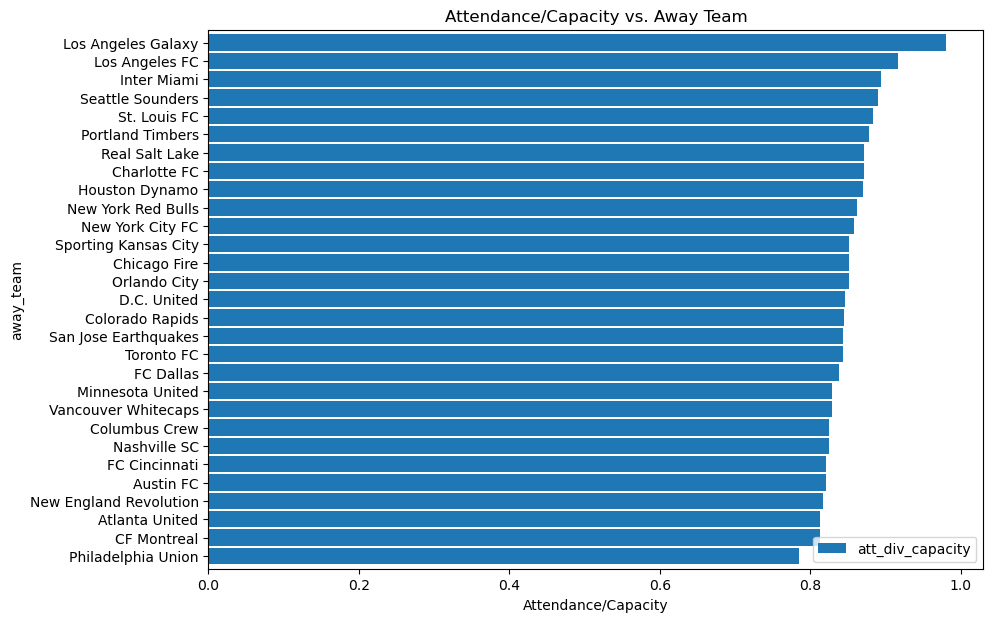

In [39]:
# Plot of attendance/capacity vs. home team
ax = mlsall_df.groupby('away_team').\
agg({x:'mean' for x in num_feats}).sort_values(by='att_div_capacity').\
plot.barh(y='att_div_capacity',
          title='Attendance/Capacity vs. Away Team',
          xlabel='Attendance/Capacity',
          width=0.9,
          figsize=(10,7))

ax.set_yticklabels([team_names[x] for x in np.argsort(mlsall_df.groupby('away_team').\
                                                      agg({'att_div_capacity':'mean'})['att_div_capacity']).values]);

The two teams that get the highest attendance for their away matches are the Los Angeles Galaxy (98.1%) and Los Angeles FC (91.6%). No other teams average over 90%.

The team with the lowest attendance for its away matches is the Philadelphia Union (78.5%). Despite being a title contender the last few years, they are the only team that averages less than 80% attendance for away matches.

**Attendance vs. Weather**

Next, I will look at how each weather feature (temperature, rain, snow, cloud cover, windspeed, windgust speed) relate to attendance.

**Temperature**

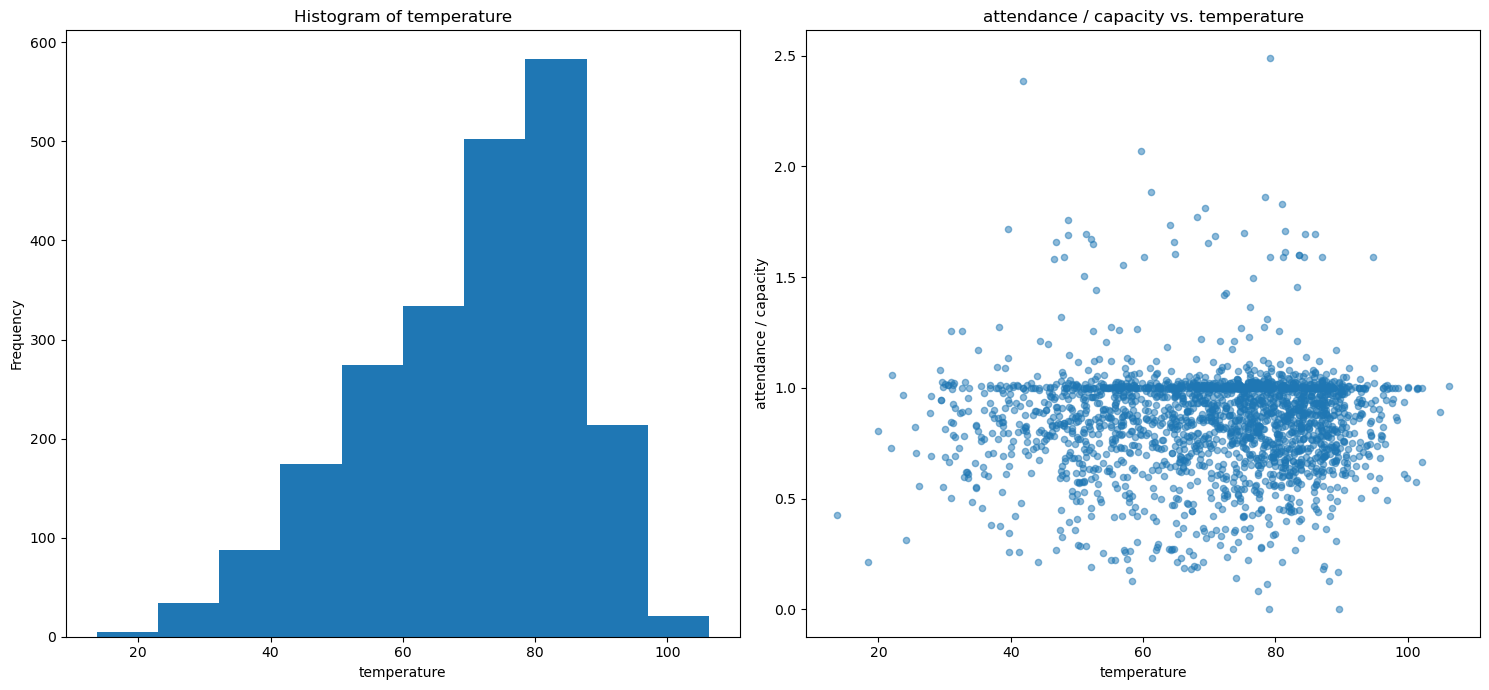

In [40]:
# Temperature
make_hist_scatter(mlsall_df, 'temperature')

There is not a super clear trend between attendance and temperature.

I also want to look at how these scatter plot looks for each individual team, which I do below.

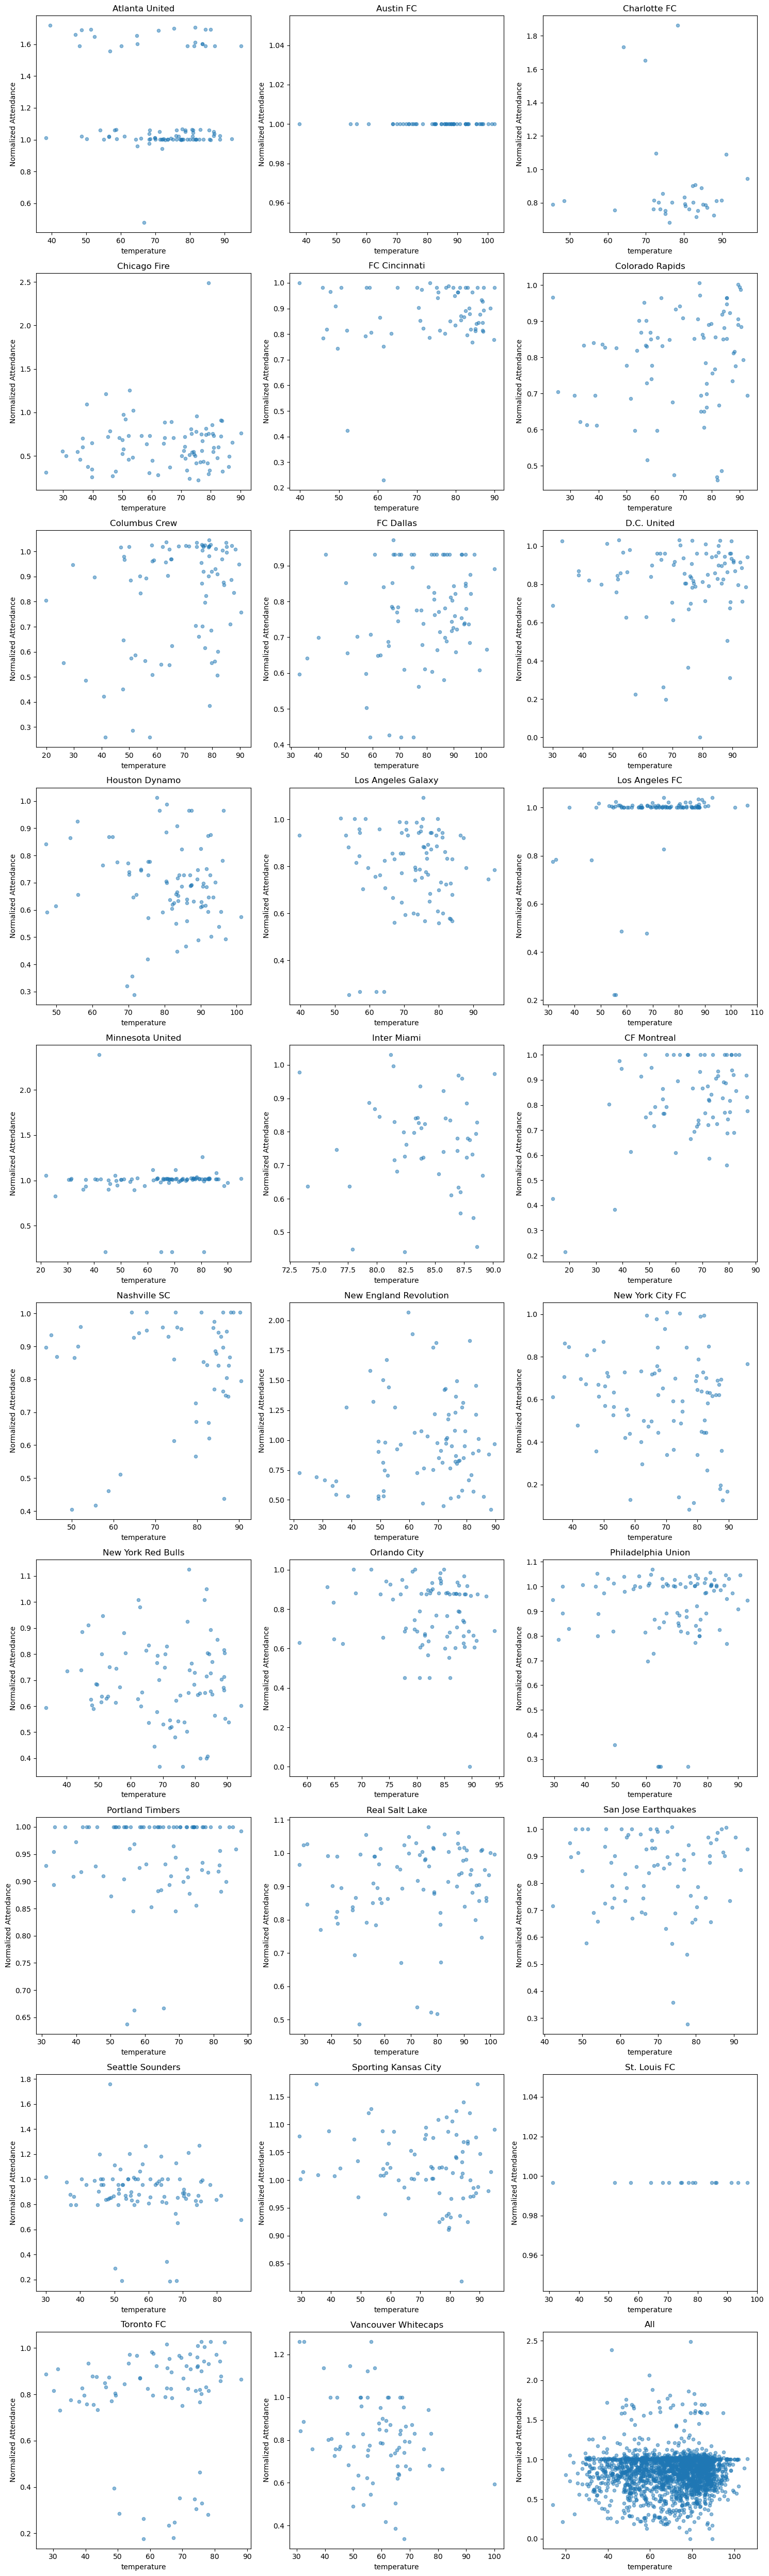

In [41]:
#Plot attendance vs. temperature
make_scatter_plots(mlsall_df, feature='temperature', split_by_team=True, label_dict=team_names)

While there is not a clear trend between temperature and attendance for any team, there is some evidence that extremely cold temperatures reduce attendance:

CF Montreal: Montreal had a few matches below 40 degrees that were very poorly attended.

New England Revolution: None of the 7 matches with a temperature below 40 degrees reach 80% attendance.

That said, several other teams have had cold matches that still had high attendance.

Below, I look at the stats for regular season matches with a temperature below 40 degrees. The average attendance was about 80% of the capacity, 5% lower than the overall average, indicating that cold temperatures might have a slight effect.

In [42]:
# Regular season matches with temperature <= 40
mlsall_df[(mlsall_df['temperature']<=40)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance    latitude   longitude  \
count        103.000000  103.000000    103.000000  103.000000  103.000000   
mean           0.799095   15.907767  18897.174757   42.167864  -92.699612   
std            0.210286    2.675916   7039.546989    3.703361   17.577162   
min            0.214199   12.000000   5128.000000   30.390000 -123.110000   
25%            0.662025   13.500000  13240.500000   39.830000 -104.890000   
50%            0.828270   15.000000  18632.000000   41.860000  -87.810000   
75%            0.968999   19.000000  23023.000000   44.950000  -77.160000   
max            1.258454   22.500000  43055.000000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      103.000000   103.000000  103.000000  103.000000  103.000000   
mean         0.980583    33.691262    0.083495    0.033301   59.737864   
std          0.138662     5.103000    0.311573    0.116740   40.414752   
min          0.000000    13.700000    0.000000    0.000000    0.000000   
25%          1.000000    31.000000    0.000000    0.000000   13.000000   
50%          1.000000    34.700000    0.000000    0.000000   77.000000   
75%          1.000000    37.950000    0.000000    0.000000  100.000000   
max          1.000000    39.900000    2.600000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff   same_conf  \
count  103.000000  103.000000  103.000000  103.000000    103.0  103.000000   
mean    14.049515   29.118447    1.737864    0.723107      0.0    0.640777   
std      7.935585   14.283542    4.522777    2.303802      0.0    0.482119   
min      1.100000    9.000000    0.000000    0.000000      0.0    0.000000   
25%      7.500000   17.600000    0.000000    0.000000      0.0    0.000000   
50%     12.400000   25.900000    0.000000    0.000000      0.0    1.000000   
75%     19.550000   40.000000    0.550000    0.385000      0.0    1.000000   
max     35.400000   69.100000   24.500000   19.040000      0.0    1.000000   

           rivals  
count  103.000000  
mean     0.067961  
std      0.252910  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

**Rain**

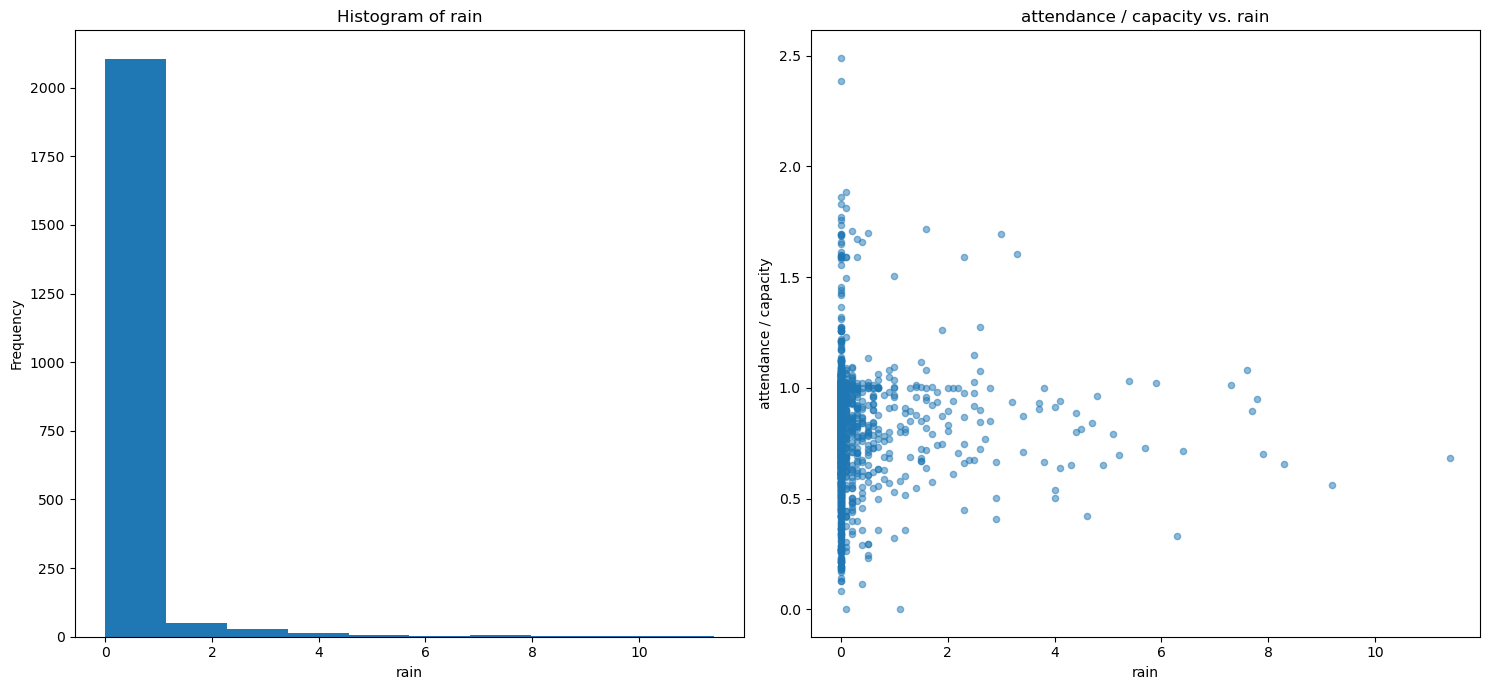

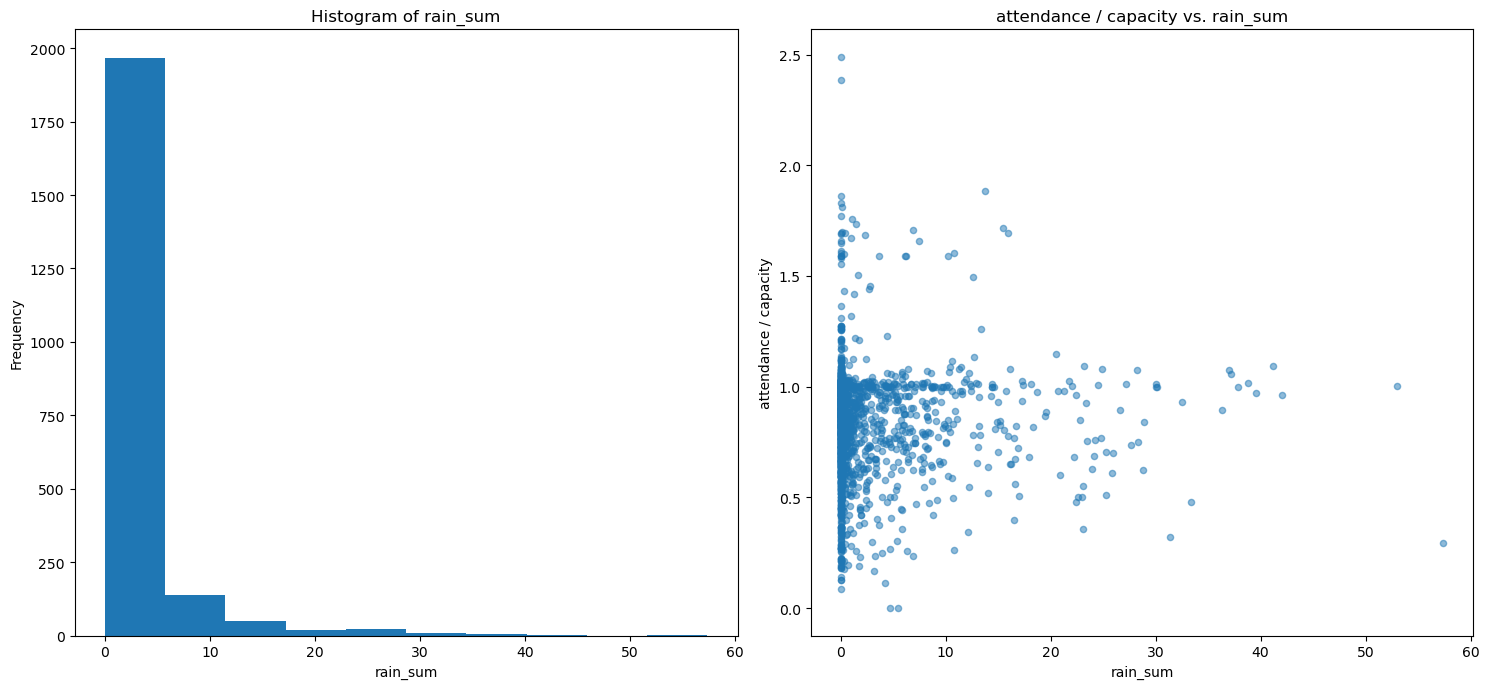

In [54]:
# Rain at kick off
make_hist_scatter(mlsall_df, 'rain')

# Rain prior to kick off
make_hist_scatter(mlsall_df, 'rain_sum')

Most matches did not have any rain at kick off, but there are 461 that did.

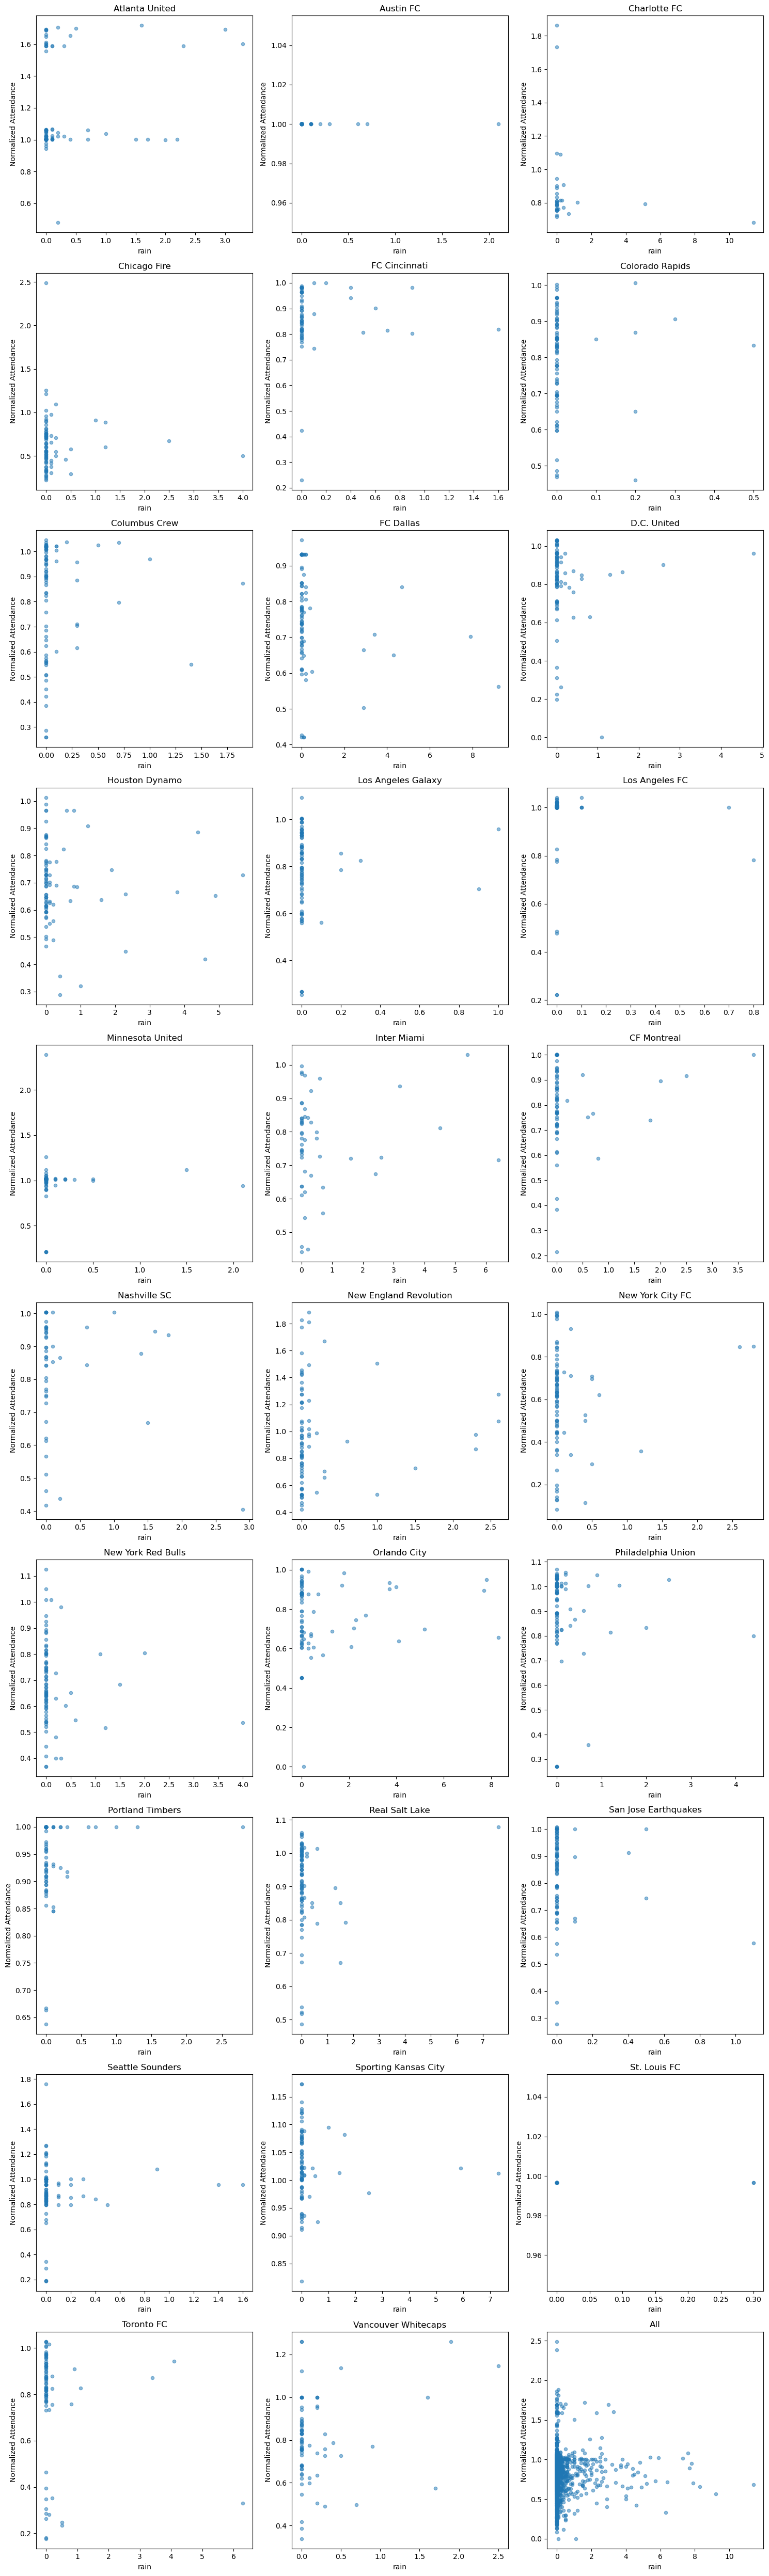

In [45]:
#Plot attendance vs. rain at kick off
make_scatter_plots(mlsall_df, feature='rain', split_by_team=True, label_dict=team_names)

In [47]:
# Regular season matches with non-zero rain at kick off
mlsall_df[(mlsall_df['rain']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance    latitude   longitude  \
count        461.000000  461.000000    461.000000  461.000000  461.000000   
mean           0.834863   18.600687  20792.036876   37.899826  -91.118807   
std            0.249707    1.914476  10525.676648    6.331344   16.340852   
min            0.000627   12.000000     16.000000   26.190000 -123.110000   
25%            0.687804   19.000000  15080.000000   33.150000  -96.840000   
50%            0.851996   19.500000  18711.000000   39.120000  -84.520000   
75%            1.000000   19.500000  22802.000000   41.860000  -79.420000   
max            1.885050   22.500000  72548.000000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      461.000000   461.000000  461.000000  461.000000  461.000000   
mean         0.991323    69.437310    0.950759    0.002278   75.127983   
std          0.092845    14.903815    1.526628    0.042618   27.314730   
min          0.000000    34.600000    0.100000    0.000000    1.000000   
25%          1.000000    58.200000    0.100000    0.000000   52.000000   
50%          1.000000    72.400000    0.300000    0.000000   86.000000   
75%          1.000000    82.100000    1.000000    0.000000  100.000000   
max          1.000000   100.100000   11.400000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff  
count  461.000000  461.000000  461.000000  461.000000    461.0  
mean    12.274620   29.762256    5.568330    0.042668      0.0  
std      6.773226   11.643323    7.705988    0.488320      0.0  
min      0.800000    6.100000    0.000000    0.000000      0.0  
25%      7.500000   21.600000    0.400000    0.000000      0.0  
50%     11.300000   28.100000    2.600000    0.000000      0.0  
75%     15.700000   34.600000    7.500000    0.000000      0.0  
max     44.700000   88.600000   57.400000    9.520000      0.0

In [55]:
# Regular season matches with non-zero rain prior to kick off
mlsall_df[(mlsall_df['rain_sum']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance    latitude   longitude  \
count        868.000000  868.000000    868.000000  868.000000  868.000000   
mean           0.836581   18.539075  20681.501152   38.559147  -90.018652   
std            0.238171    1.896272   9811.465277    5.948395   15.781003   
min            0.000627   12.000000     16.000000   26.190000 -123.110000   
25%            0.707137   19.000000  15400.250000   33.750000  -96.840000   
50%            0.859250   19.500000  19011.000000   39.830000  -84.460000   
75%            1.000000   19.500000  22495.750000   42.090000  -77.010000   
max            1.885050   22.500000  72548.000000   49.280000  -71.260000   

       real_home_team  temperature        rain        snow  cloudcover  \
count      868.000000   868.000000  868.000000  868.000000  868.000000   
mean         0.993088    69.020392    0.457373    0.002339   65.081797   
std          0.082901    15.111685    1.164262    0.037591   32.489892   
min          0.000000    25.500000    0.000000    0.000000    0.000000   
25%          1.000000    57.650000    0.000000    0.000000   38.000000   
50%          1.000000    71.900000    0.000000    0.000000   69.000000   
75%          1.000000    81.825000    0.300000    0.000000  100.000000   
max          1.000000    96.800000   11.400000    0.910000  100.000000   

        windspeed    windgust    rain_sum    snow_sum  playoff  
count  868.000000  868.000000  868.000000  868.000000    868.0  
mean    12.685138   30.348733    4.970507    0.057500      0.0  
std      6.999385   12.256799    7.368470    0.502113      0.0  
min      0.000000    6.100000    0.100000    0.000000      0.0  
25%      7.500000   21.600000    0.500000    0.000000      0.0  
50%     11.600000   28.250000    1.900000    0.000000      0.0  
75%     16.700000   36.000000    6.200000    0.000000      0.0  
max     44.700000   88.600000   57.400000    9.520000      0.0

The average attendance for the 461 regular season matches that had rain at kick off was 83.4%.

For the 868 regular season matches that were preceded by rain, the average attendance was 83.8%.

These are both a little smaller than the 85% average for the entire dataset.

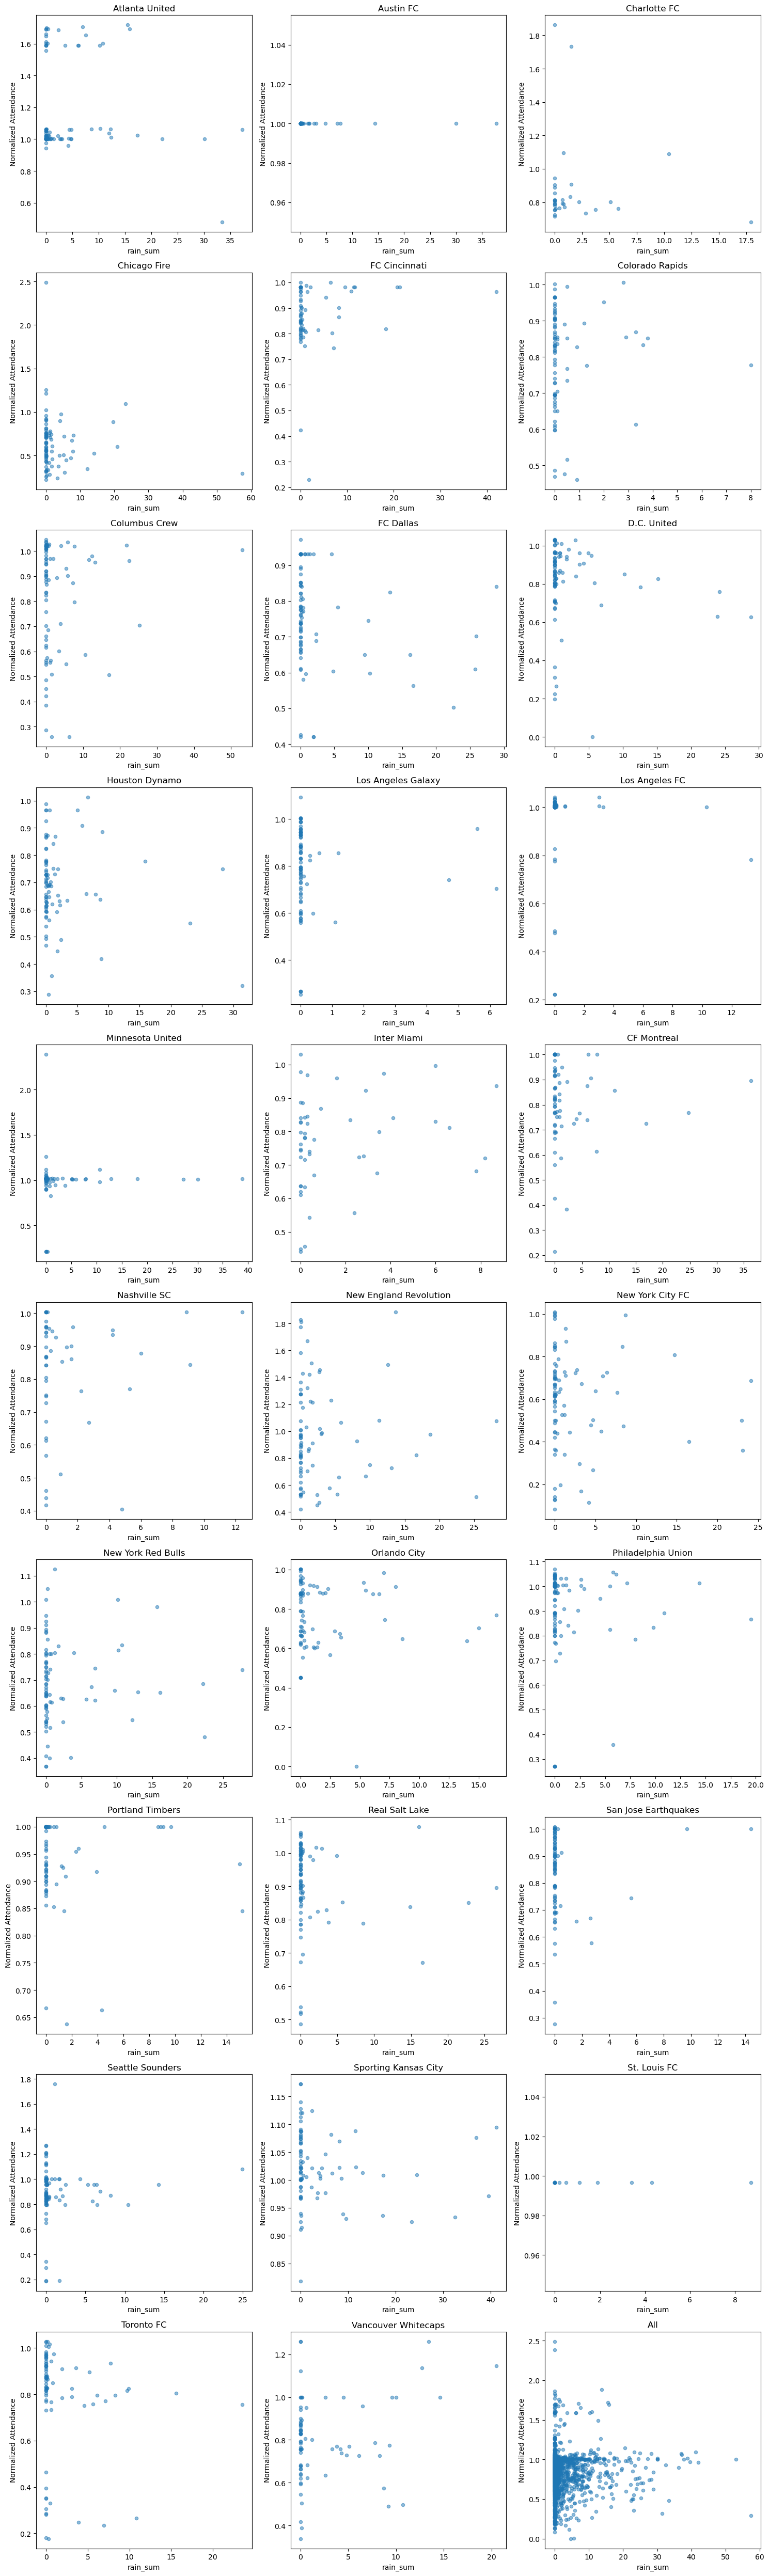

In [56]:
#Plot attendance vs. rain prior to kick off
make_scatter_plots(mlsall_df, feature='rain_sum', split_by_team=True, label_dict=team_names)

DESCRIBE trends above

**Snow**

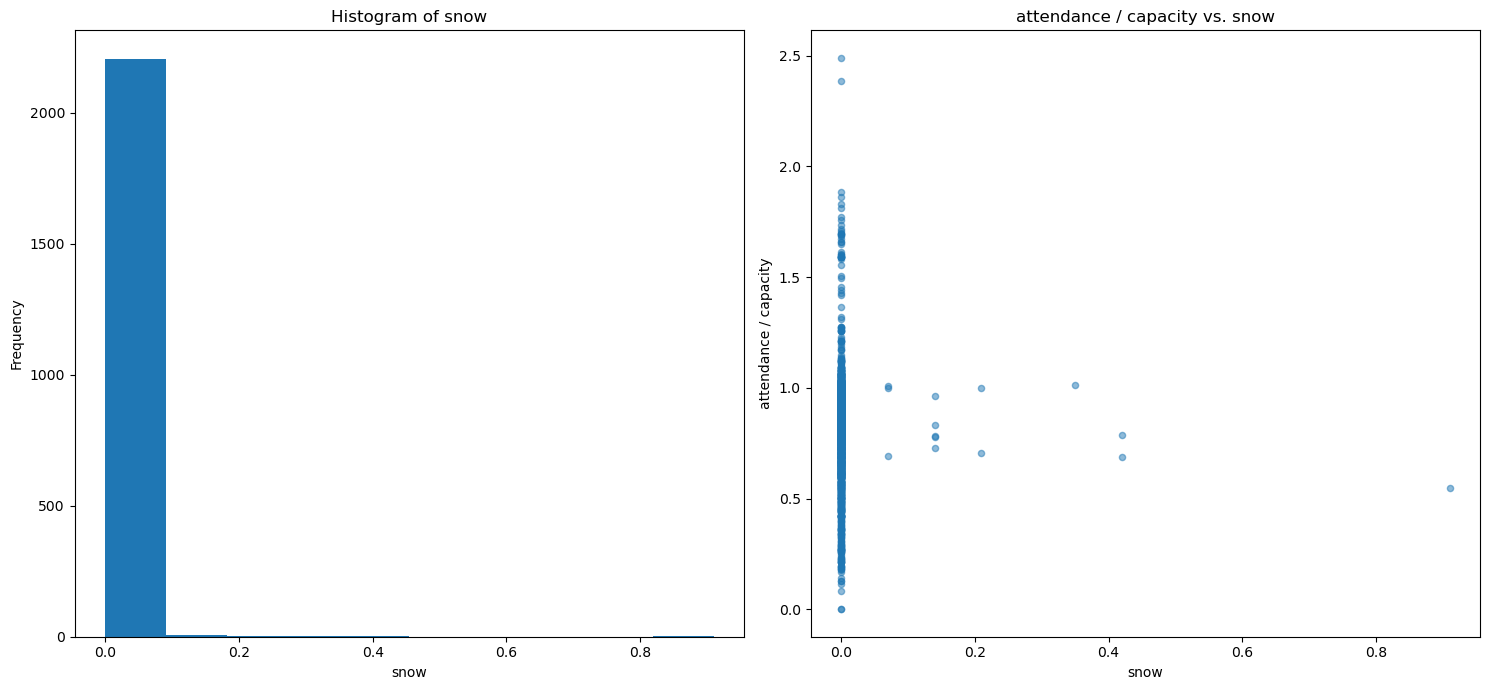

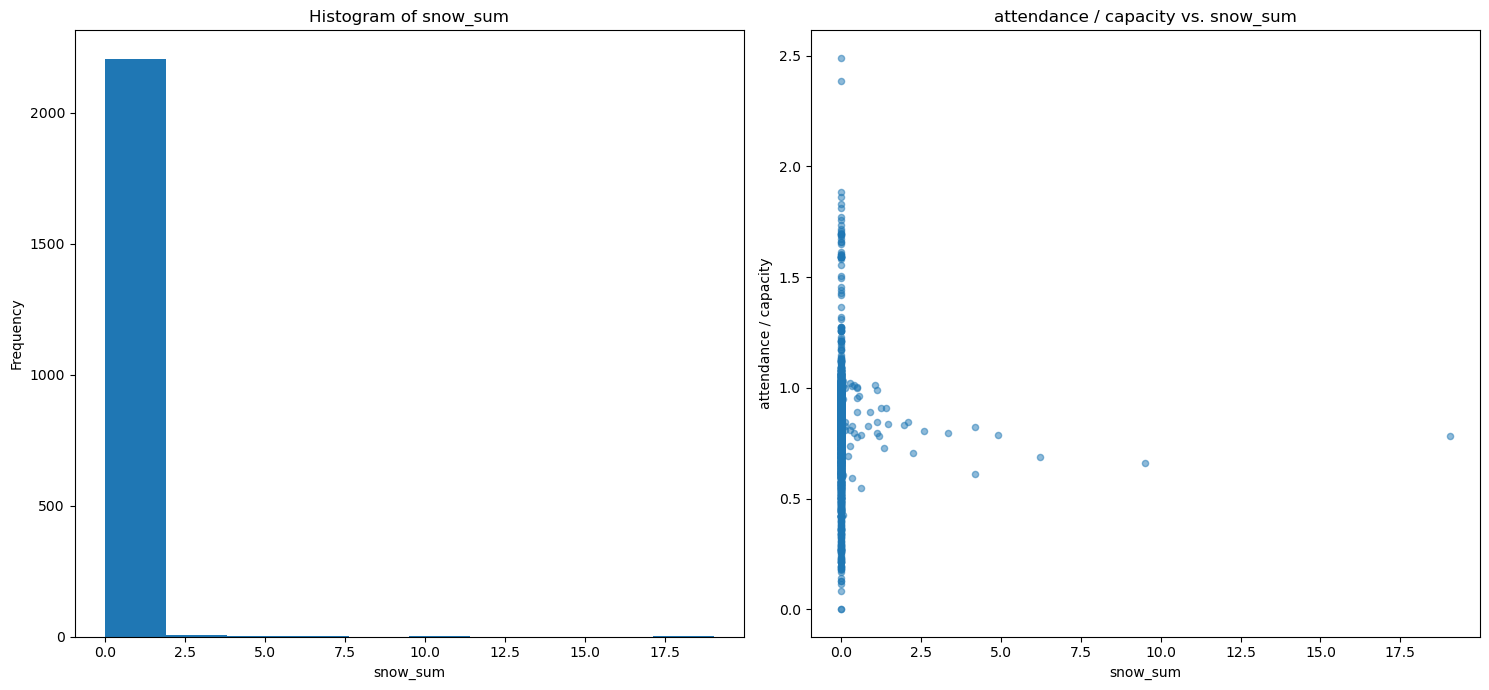

In [57]:
# Snow at kick off
make_hist_scatter(mlsall_df, 'snow')

# Snow prior to kick off
make_hist_scatter(mlsall_df, 'snow_sum')

Very few matches had snow. That is not surprising since MLS tries to avoid playing matches in winter and will typically suspend matches if the weather is poor.

In [58]:
# Regular season matches with non-zero snow at kick off
mlsall_df[(mlsall_df['snow']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance   latitude   longitude  \
count         14.000000   14.000000     14.000000  14.000000   14.000000   
mean           0.823370   18.214286  18068.571429  41.051429  -88.310714   
std            0.149977    2.524604   5519.320230   2.079848   13.730457   
min            0.545400   13.500000  10908.000000  38.870000 -111.890000   
25%            0.710627   16.250000  13979.500000  39.810000 -102.372500   
50%            0.784340   19.500000  18571.000000  39.830000  -81.970000   
75%            0.991280   19.500000  20429.250000  43.245000  -77.612500   
max            1.011031   22.500000  32250.000000  44.950000  -71.260000   

       real_home_team  temperature       rain       snow  cloudcover  \
count       14.000000    14.000000  14.000000  14.000000   14.000000   
mean         0.857143    32.214286   0.028571   0.245000   85.357143   
std          0.363137     3.430599   0.061125   0.225994   21.702914   
min          0.000000    25.600000   0.000000   0.070000   47.000000   
25%          1.000000    30.700000   0.000000   0.140000   67.750000   
50%          1.000000    31.850000   0.000000   0.140000  100.000000   
75%          1.000000    34.250000   0.000000   0.315000  100.000000   
max          1.000000    39.800000   0.200000   0.910000  100.000000   

       windspeed   windgust   rain_sum  snow_sum  playoff  
count  14.000000  14.000000  14.000000   14.0000     14.0  
mean   17.992857  37.307143   2.842857    2.8300      0.0  
std     7.340768  16.069774   6.779575    5.0102      0.0  
min     7.700000  20.500000   0.000000    0.1400      0.0  
25%    14.200000  22.575000   0.000000    0.4900      0.0  
50%    17.100000  37.450000   0.000000    0.8400      0.0  
75%    21.200000  44.025000   0.325000    2.1700      0.0  
max    31.400000  69.100000  24.500000   19.0400      0.0

In [59]:
# Regular season matches with non-zero snow prior to kick off
mlsall_df[(mlsall_df['snow_sum']>0)&(mlsall_df['playoff']==0)][num_feats].describe()

att_div_capacity  local_time    attendance   latitude   longitude  \
count         47.000000   47.000000     47.000000  47.000000   47.000000   
mean           0.824803   18.021277  19217.170213  41.855106  -91.110000   
std            0.136969    2.340470   4931.293486   2.482731   16.365078   
min            0.426284   13.000000  10908.000000  38.870000 -122.690000   
25%            0.778985   16.000000  15612.000000  39.820000 -104.890000   
50%            0.827733   19.000000  18510.000000  40.740000  -87.620000   
75%            0.929424   19.500000  22182.500000  43.630000  -76.195000   
max            1.020412   22.500000  32250.000000  47.600000  -71.260000   

       real_home_team  temperature       rain       snow  cloudcover  \
count       47.000000    47.000000  47.000000  47.000000   47.000000   
mean         0.936170    36.527660   0.125532   0.072979   79.319149   
std          0.247092     8.119453   0.405113   0.165108   29.784083   
min          0.000000    13.700000   0.000000   0.000000    0.000000   
25%          1.000000    31.500000   0.000000   0.000000   60.500000   
50%          1.000000    35.500000   0.000000   0.000000   94.000000   
75%          1.000000    41.550000   0.100000   0.070000  100.000000   
max          1.000000    57.700000   2.600000   0.910000  100.000000   

       windspeed   windgust   rain_sum   snow_sum  playoff  
count  47.000000  47.000000  47.000000  47.000000     47.0  
mean   16.640426  35.446809   3.702128   1.727660      0.0  
std     9.068164  16.519881   6.416978   3.165487      0.0  
min     1.100000   9.000000   0.000000   0.070000      0.0  
25%     8.850000  21.200000   0.000000   0.315000      0.0  
50%    16.100000  34.600000   0.400000   0.630000      0.0  
75%    23.850000  47.150000   5.200000   1.435000      0.0  
max    35.000000  69.800000  27.700000  19.040000      0.0

There have been 14 matches with snow at kick off and 47 that had snow prior to kick off (there is overlap between the two).

The average attendance for these matches was 82.3% and 82.4%, respectively. This is a little less than the overall average.

**Cloud cover**

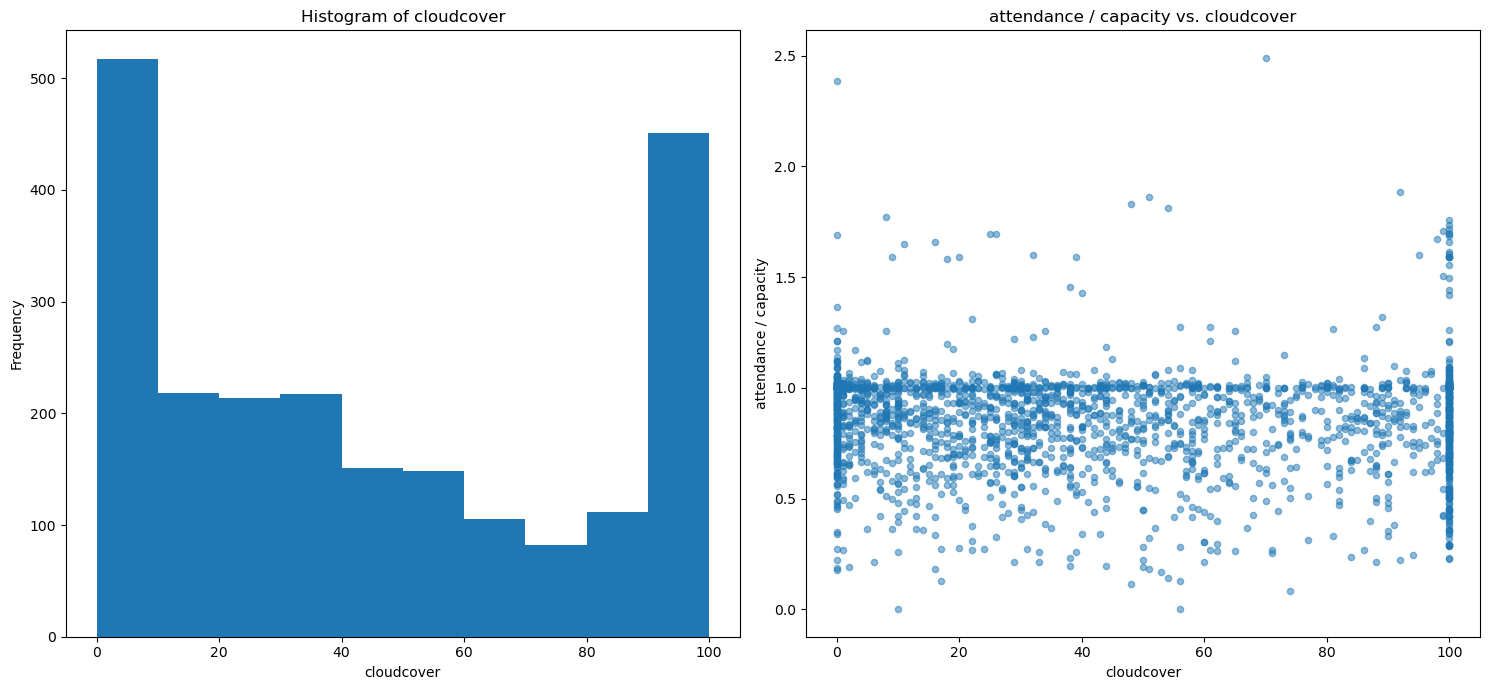

In [60]:
# Cloud cover at kick off
make_hist_scatter(mlsall_df, 'cloudcover')

The cloud cover describes the percentage of the sky covered by clouds. Most matches had either 0 or 100% cloud cover, but values in between are well represented.

There is no obvious trend between attendance and cloud cover.

**Windspeed and windgust speed**

Windspeed is the average speed of the wind in km/h.

Windgust speed is the speed of the gusts of wind in km/h.

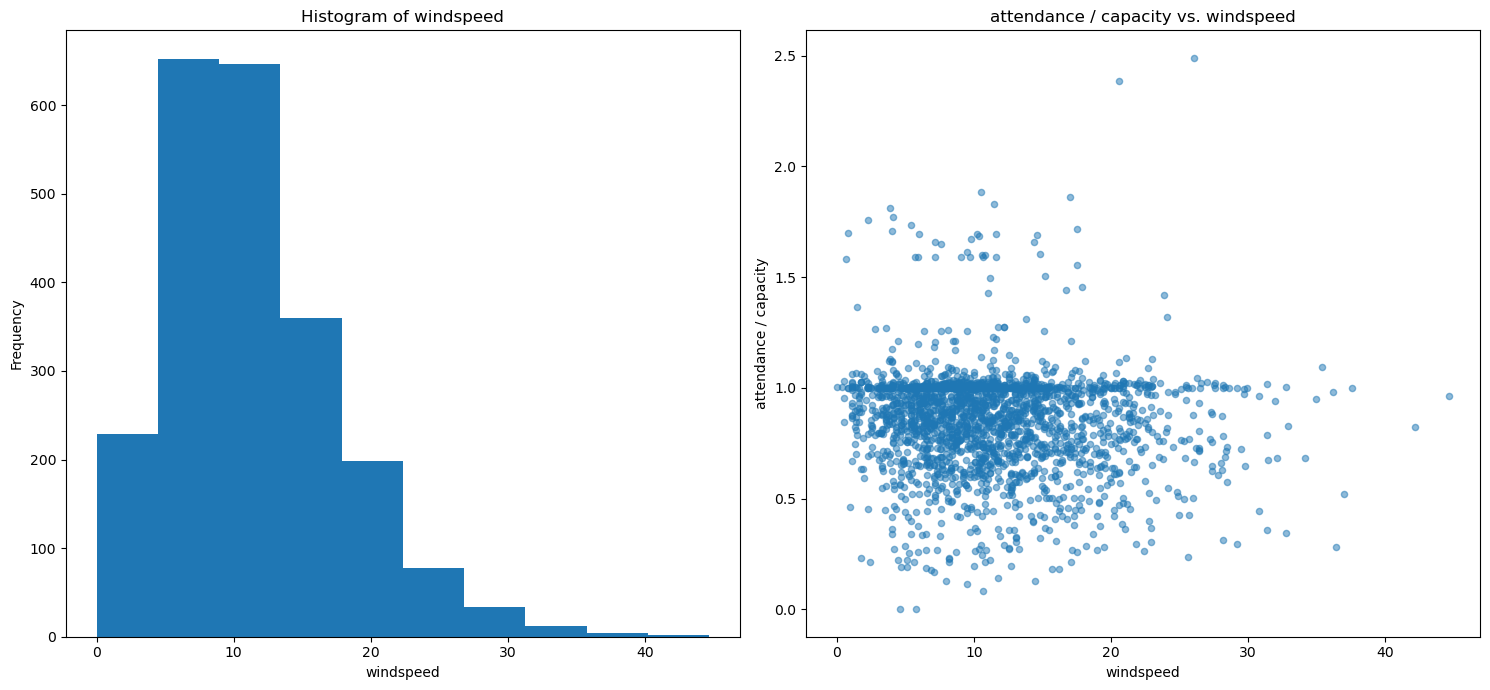

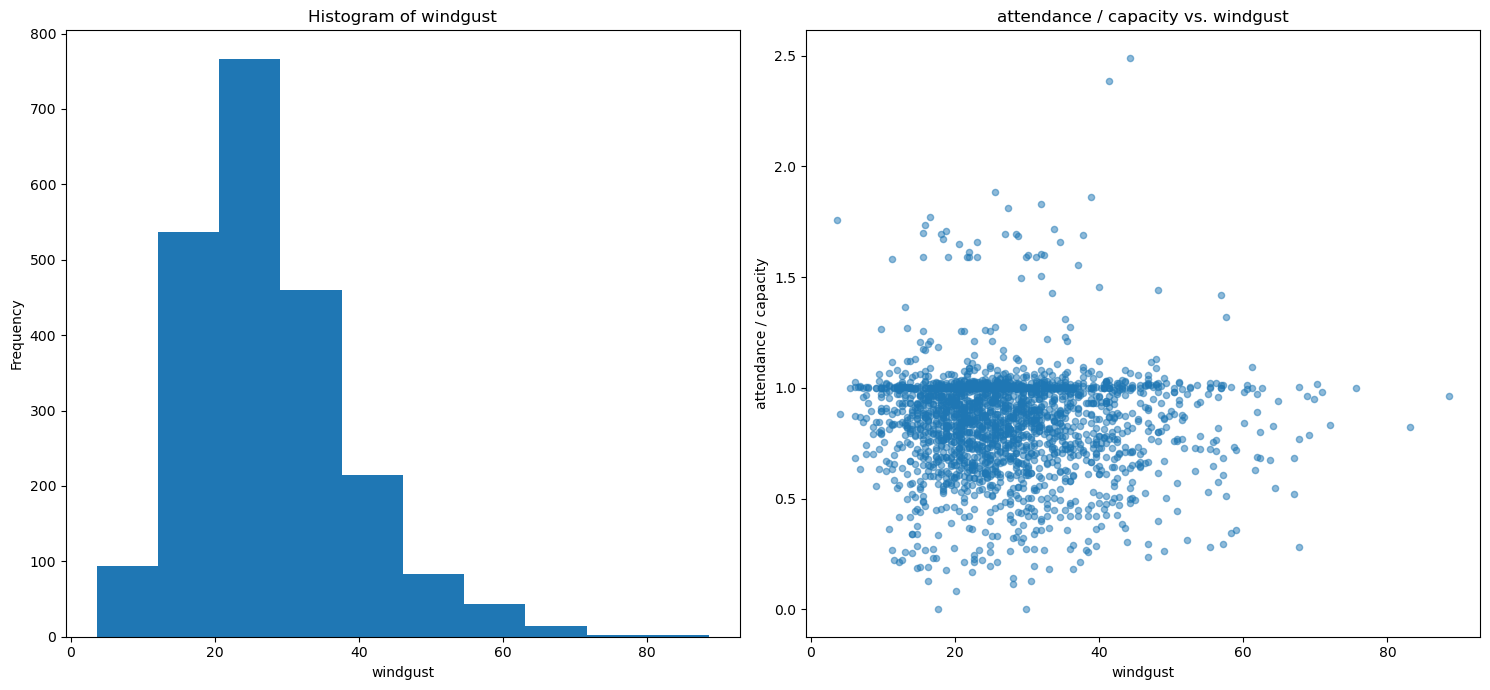

In [61]:
# Windspeed at kick off
make_hist_scatter(mlsall_df, 'windspeed')

# Windgust speed at kick off
make_hist_scatter(mlsall_df, 'windgust')

The scatterplots don't seem to have a strong trend with attendance.

The distributions and scatterplots for windspeed and windgust speed look very similar. Let's check out the scatterplot of windspeed vs windgust below.

<Axes: xlabel='windspeed', ylabel='windgust'>

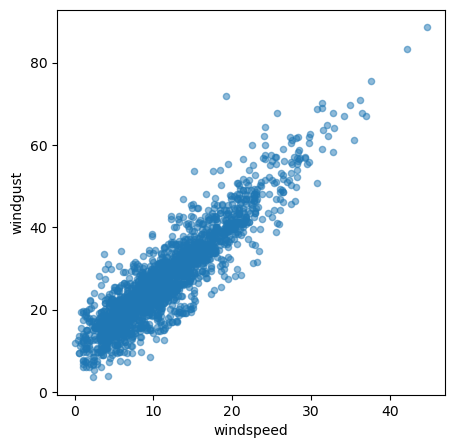

In [65]:
fig, ax = plt.subplots(figsize=(5,5))

mlsall_df.plot.scatter(x='windspeed',
                       y='windgust',
                       ax=ax,
                       alpha=0.5)

There is a strong correlation between windspeed and windgust, so at most one of these features would be used for the model.

**Attendance vs. Regular Season/Playoffs**

Below, I look at how attendance changes from the regular season to the playoffs. There are far more regular season matches, but still a solid sample of playoff matches.

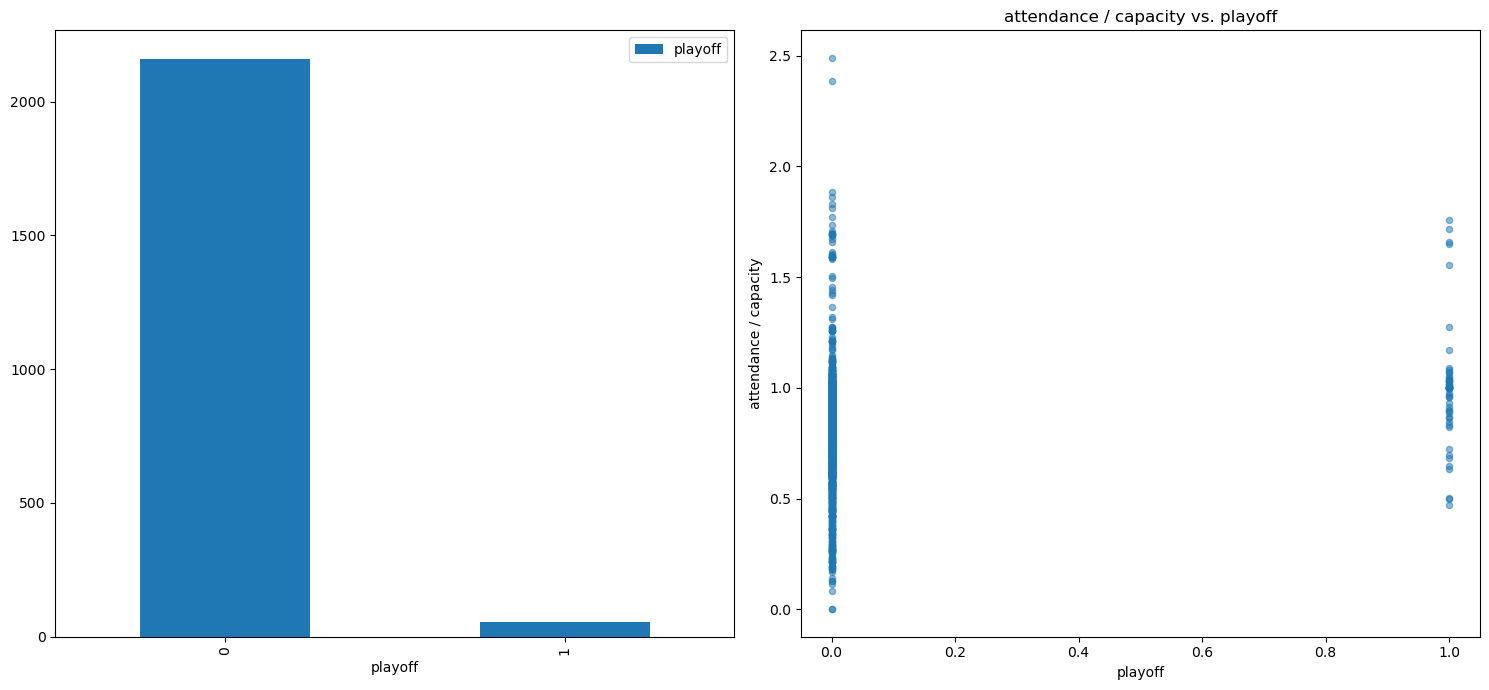

In [67]:
make_bar_scatter(mlsall_df, 'playoff')

In [68]:
mlsall_df.groupby('playoff').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude  longitude  \
playoff                                                                     
0                0.846579   18.363401  20618.880037  38.767091 -93.934062   
1                0.997887   17.151786  26786.964286  39.509643 -95.334643   

         real_home_team  temperature      rain      snow  cloudcover  \
playoff                                                                
0              0.992589    70.852154  0.203011  0.001589   44.520148   
1              0.982143    53.539286  0.217857  0.000000   41.607143   

         windspeed   windgust  rain_sum  snow_sum  playoff  
playoff                                                     
0        11.416628  27.444280  1.998333   0.03761      0.0  
1        10.930357  25.194643  1.833929   0.00125      1.0

Playoff matches have very good attendance figures. They average nearly 100% attendance compared to 84.7% for regular season matches.

**Attendance vs. real home team**

On some occasions, teams were forced to play "home" matches away from their actual home stadium. Most of these were Canadian teams that were forced to play some of their home matches in the US (Montreal and Toronto had to play in Orlando and Vancouver had to play in Utah) during the pandemic. New York City FC also had to play a few matches in the home stadium of the New York Red Bulls.

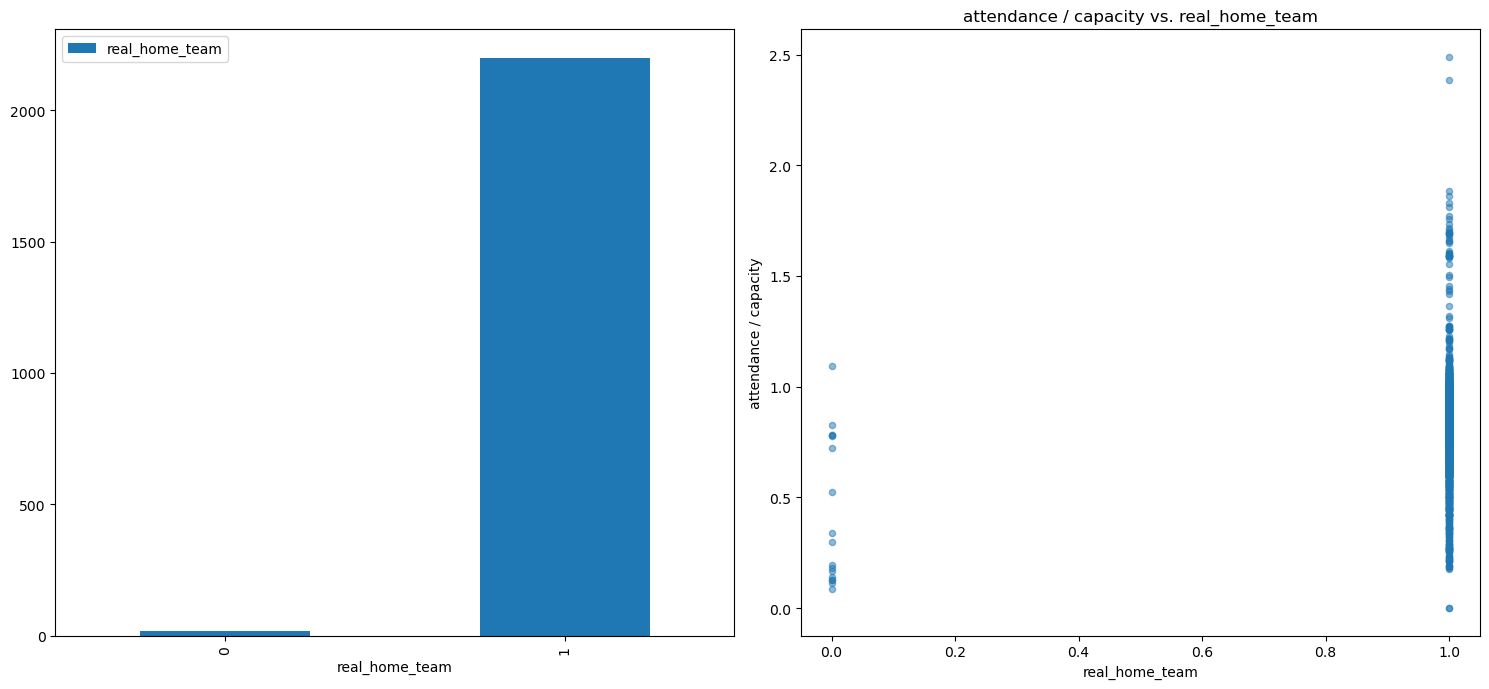

In [69]:
make_bar_scatter(mlsall_df, 'real_home_team')

In [70]:
mlsall_df.groupby('real_home_team').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance   latitude  \
real_home_team                                                          
0                       0.428912   18.235294  11088.588235  40.454706   
1                       0.853665   18.333523  20849.738854  38.772957   

                longitude  real_home_team  temperature      rain      snow  \
real_home_team                                                               
0              -80.257647             0.0    68.688235  0.123529  0.016471   
1              -94.075523             1.0    70.427798  0.204004  0.001433   

                cloudcover  windspeed   windgust  rain_sum  snow_sum   playoff  
real_home_team                                                                  
0                57.470588  13.894118  30.094118  1.652941  1.218824  0.058824  
1                44.345769  11.385077  27.366470  1.996815  0.027548  0.025023

Not surprisingly, the attendance drops dramatically when neither team is really the home team. On average, matches without a real home team only averaged 42.9% attendance.

### Summary

There do appear to be some factors that affect attendance.

The factor I looked at that had the biggest effect was when a match does not actually have a home team, but this is not something MLS wants to have, anyway.



att_div_capacity    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

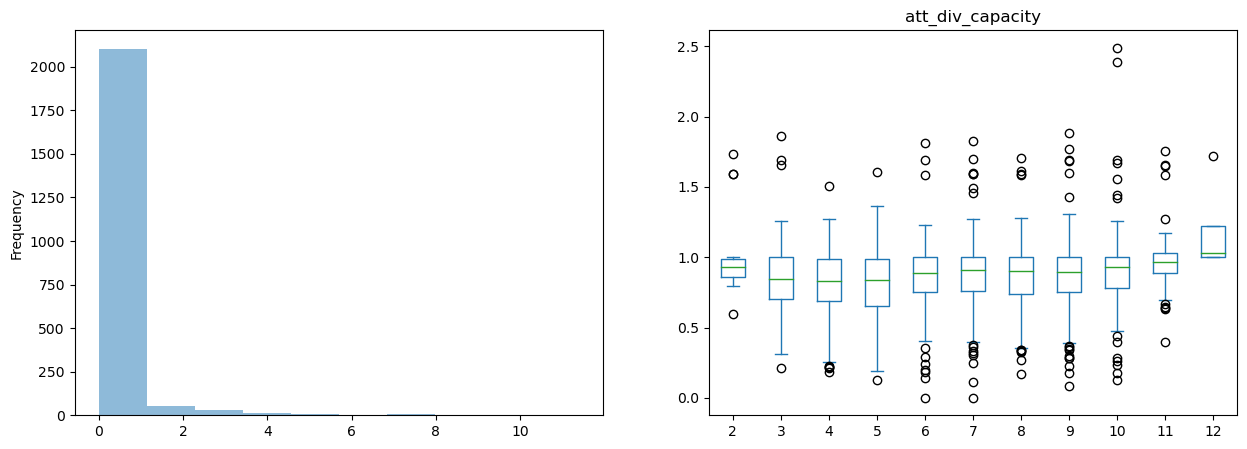

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

mlsall_df['rain'].plot.hist(bins=10, ax=ax[0], alpha=0.5)
mlsall_df.plot.box(column=['att_div_capacity'], by='date_month', ax=ax[1])

### Months

Below, I look at how the matches are distributed throughout the year. The MLS regular season starts in late February and ends in October. Then, there is about a month and a half of playoffs that end in December.

Other than February and December, there are at least 500 matches for each month.

In [32]:
mlsall_df.groupby(by='date_month').agg({'date_month':'count', 'att_div_capacity':'mean'})

date_month  att_div_capacity
date_month                              
2                   27          0.979038
3                  198          0.836999
4                  245          0.802260
5                  318          0.783570
6                  225          0.858731
7                  322          0.870895
8                  311          0.857170
9                  310          0.867673
10                 212          0.891753
11                  43          0.993807
12                   4          1.192861

<Axes: xlabel='date_month', ylabel='Normalized Attendance'>

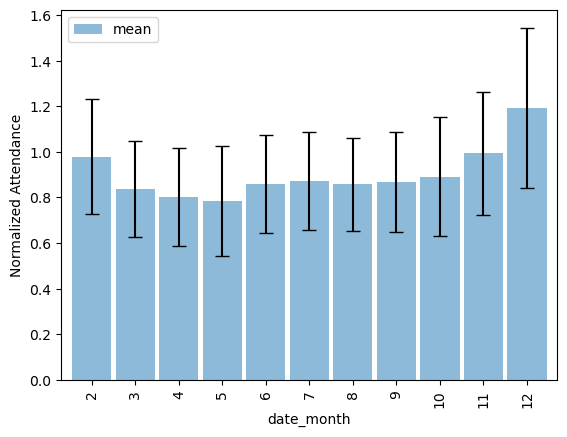

In [60]:
mlsall_df.groupby(by='date_month').agg({'date_month':'count',
                                        'att_div_capacity':['mean','std']})['att_div_capacity'].plot(y='mean',
                                                                                                     kind='bar',
                                                                                                     yerr='std',
                                                                                                     capstyle='butt',
                                                                                                     capsize=5,
                                                                                                     width=0.9,
                                                                                                     alpha=0.5,
                                                                                                     ylabel='Normalized Attendance')

att_div_capacity    Axes(0.125,0.11;0.775x0.77)
dtype: object

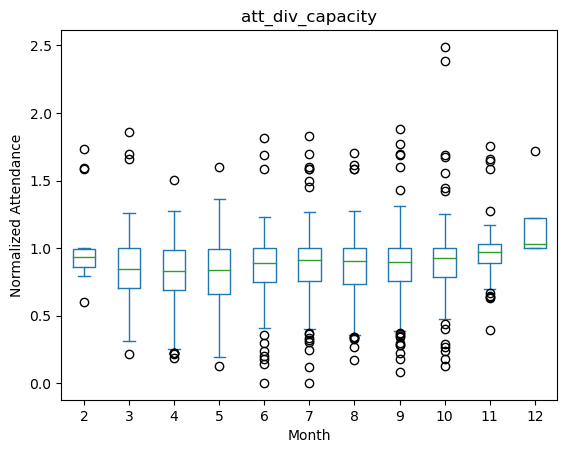

In [71]:
mlsall_df.plot.box(by='date_month',
                  column='att_div_capacity',
                  grid=False,
                  ylabel='Normalized Attendance',
                  xlabel='Month')

<Axes: title={'center': 'att_div_capacity'}, xlabel='Month', ylabel='Normalized Attendance'>

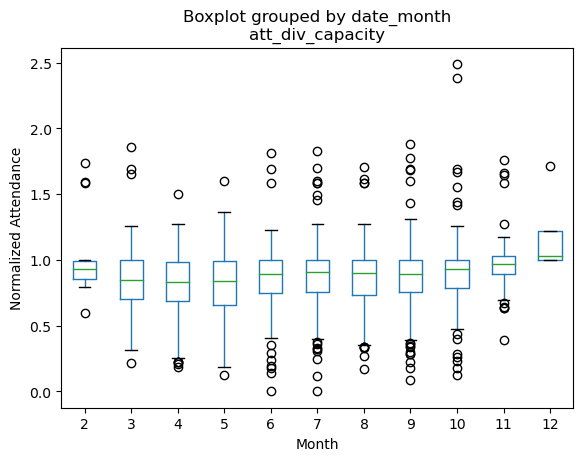

In [68]:
mlsall_df.boxplot(by='date_month',
                  column='att_div_capacity',
                  grid=False,
                  ylabel='Normalized Attendance',
                  xlabel='Month')

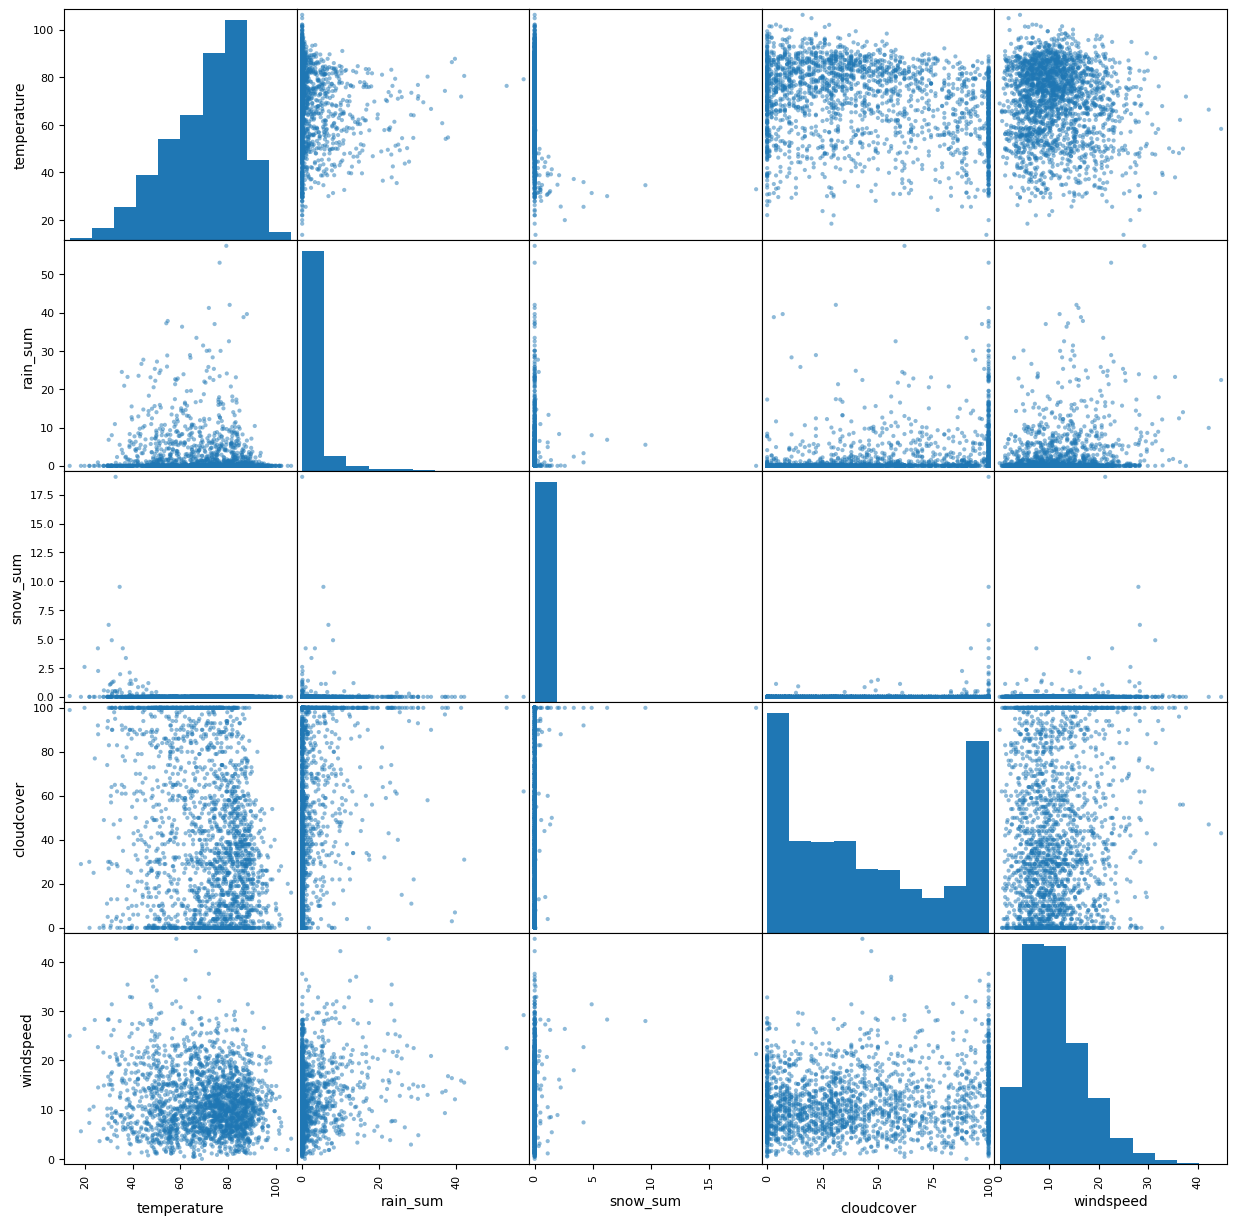

In [79]:
pd.plotting.scatter_matrix(mlsall_df[['temperature','rain_sum','snow_sum','cloudcover','windspeed']], figsize=(15,15));

In [96]:
mlsall_df[mlsall_df['home_team']==21].groupby(by='date_year').agg({x:'mean' for x in num_feats})

att_div_capacity  local_time    attendance  latitude  longitude  \
date_year                                                                    
2018               1.000000   17.605263  21144.000000     45.52    -122.69   
2019               1.000000   18.377451  25218.000000     45.52    -122.69   
2021               0.868139   17.433333  21892.733333     45.52    -122.69   
2022               0.945415   17.676471  23841.470588     45.52    -122.69   
2023               0.916115   19.000000  23102.588235     45.52    -122.69   

           real_home_team  temperature      rain  snow  cloudcover  windspeed  \
date_year                                                                       
2018                  1.0    61.252632  0.142105   0.0   43.263158   7.042105   
2019                  1.0    67.882353  0.111765   0.0   59.470588   6.382353   
2021                  1.0    59.760000  0.213333   0.0   52.133333   9.593333   
2022                  1.0    63.241176  0.005882   0.0   33.352941   7.594118   
2023                  1.0    64.488235  0.047059   0.0   49.235294   7.005882   

            windgust  rain_sum  snow_sum   playoff  same_conf    rivals  
date_year                                                                
2018       22.315789  1.178947  0.000000  0.105263   0.736842  0.210526  
2019       21.494118  0.647059  0.000000  0.000000   0.647059  0.117647  
2021       26.073333  2.313333  0.000000  0.200000   0.866667  0.133333  
2022       22.517647  1.029412  0.000000  0.000000   0.764706  0.117647  
2023       23.517647  0.535294  0.111176  0.000000   0.823529  0.176471